## Data exploration ##

In [1]:
# Load packages
library(mgcv)
library(ggplot2)
library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(writexl)
library(magrittr)
library(rstatix)

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::collapse() masks nlme::collapse()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attac

In [63]:
PATH <- file.path("C:/Users/julia/OneDrive - London School of Hygiene and Tropical Medicine/Documents/LSHTM/Project") #"/home/andewegs/1_RSV_scripts/"
setwd(PATH)
getwd()
rsv.data <- read_csv(file = "Data/infection_status.csv")

[1] "C:/Users/julia/OneDrive - London School of Hygiene and Tropical Medicine/Documents/LSHTM/Project"

Rows: 682 Columns: 23
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (20): age_days, infection, IgG_PreF, IgA_PreF, IgG_PostF, IgA_PostF, Ig...
lgl   (1): IgA_Nn_household
date  (2): birthday, consultdate

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head(rsv.data)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,IgA_Nn_household,household04,household59,visitnursery_child,visitnursery_house,pregnancytime,contacttotal,contact04,contact59,sex
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
676,2004-04-01,2006-02-06,1,0.3565,0.60,9.3264,0.08,0.260000,0.01,⋯,NA,NA,0,0,0,NA,3,1,0,2
600,2004-07-23,2006-03-15,1,772.3431,33.15,473.5323,14.52,3.130699,0.02,⋯,NA,1,0,1,0,NA,29,20,0,1
588,2004-08-09,2006-03-20,0,0.1800,0.03,0.2100,0.19,0.580000,0.03,⋯,NA,1,0,0,0,NA,4,1,0,2
591,2004-08-06,2006-03-20,1,740.2907,70.38,466.2055,49.78,1.886910,0.05,⋯,NA,1,1,0,0,NA,2,0,0,2
1184,2002-12-29,2006-03-27,1,1999.2353,NA,1459.5921,NA,55.896003,NA,⋯,NA,1,1,0,0,NA,6,2,3,1
686,2004-05-12,2006-03-29,1,807.2200,NA,838.7400,NA,15.000000,NA,⋯,NA,1,0,0,0,NA,2,0,0,2


In [4]:
#get number of children
nrow(rsv.data)

[1] 682

In [5]:
#count total missing values in each column of data frame
sapply(rsv.data, function(x) sum(is.na(x)))

age_days           birthday        consultdate          infection 
                 0                  0                  0                  0 
          IgG_PreF           IgA_PreF          IgG_PostF          IgA_PostF 
                 0                185                  0                185 
            IgG_Ga             IgA_Ga             IgG_Gb             IgA_Gb 
                 0                185                  0                185 
             IgG_N   IgA_Nn_household        household04        household59 
                 0                682                 61                  0 
visitnursery_child visitnursery_house      pregnancytime       contacttotal 
                22                 30                400                 96 
         contact04          contact59                sex 
               178                178                  0

In [7]:
get_summary_stats(rsv.data, show = c("n", "min", "max", "median", "mean", "sd"))

variable,n,min,max,median,mean,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age_days,682,36.000,1854.00,345.000,537.837,454.629
contact04,504,0.000,40.00,1.000,3.107,5.423
contact59,504,0.000,50.00,0.000,1.212,3.941
contacttotal,586,0.000,200.00,5.000,8.718,14.406
household04,621,1.000,3.00,1.000,1.467,0.610
household59,682,0.000,3.00,0.000,0.350,0.654
IgA_Ga,497,0.010,7.22,0.020,0.063,0.353
IgA_Gb,497,0.010,18.30,0.020,0.100,0.860
IgA_PostF,497,0.010,350.00,0.080,2.316,16.361


In [3]:
rsv.data <- rsv.data %>%
  # Get day of the year of birthday (= number between 1 and 365)
  mutate(
    Birth_doy = birthday %>% yday()
  ) %>%
  # Alter number of housefold members 1 == no siblings, >1 == having siblings
  mutate(
    household04_counts = case_when(
      age_days/365 >= 5 ~ (household04 + 1),  #because the child itself is also included in household size
      age_days/365 < 5 ~ household04)       #the household04 of children of age 5 should also include the child itself
  ) %>%
  # Make number of siblings 0-4 years binary factor variable
  mutate(
    Siblings04 = case_when(
      household04_counts <= 1 ~ 'False',
      household04_counts > 1 ~ 'True'
    ) %>% 
      factor()
  ) %>%
  # Make number of siblings 5-9 years binary factor variable
  mutate(
    Siblings59 = case_when(
      household59 <= 0 ~ 'False',
      household59 > 0 ~ 'True'
    ) %>% 
      factor()
  ) %>% 
  # Set nursery 0 1 to False True
  mutate(
    Nursery = case_when(
      visitnursery_child == 0 ~ 'False',
      visitnursery_child == 1 ~ 'True'
    ) %>% 
      factor()
  )

In [11]:
nrow(rsv.data)

[1] 682

In [14]:
completeVec <- complete.cases(rsv.data[, c("Siblings04", "Nursery")]) ##keeps participants with complete records of Siblings and Nursery only
complete.rsv.data <- rsv.data[completeVec,]
nrow(complete.rsv.data)

[1] 616

In [44]:
print(complete.rsv.data$birthday[10:20])


 [1] "2002-10-13" "2003-08-22" "2004-09-20" "2004-02-25" "2004-09-03"
 [6] "2002-06-04" "2003-08-25" "2002-12-04" "2001-05-07" "2002-06-03"
[11] "2001-04-24"


In [31]:
print(rsv.data$birthday[1])

[1] "2004-04-01"


## Baseline distribution ##

In [64]:
rsv.data <- rsv.data %>%
 mutate(
    Birth_mo = birthday %>% month()
  )

In [65]:
#age divided into 6 months groups
season_border = "10-01" #MM-DD
spring <- c(3, 4, 5)
summer <- c(6, 7, 8)
autumn <- c (9, 10, 11)
winter <- c(1, 2, 12)
rsv.data <- rsv.data %>%
  mutate(
    age_years = case_when(
      age_days <= 30.41*6 ~ '0-6 months',
      age_days > 30.41*6 & age_days <= 30.41*12 ~ '6-12 months',
      age_days > 30.41*12 & age_days <= 30.41*18 ~ '12-18 months',
      age_days > 30.41*18 & age_days <= 30.41*24 ~ '18-24 months',
      age_days > 30.41*24 & age_days <= 30.41*30 ~ '24-30 months',
      age_days > 30.41*30 & age_days <= 30.41*36 ~ '30-36 months',
      age_days > 30.41*36 & age_days <= 30.41*42 ~ '36-42 months',
      age_days > 30.41*42 & age_days <= 30.41*48 ~ '42-48 months',
      age_days > 30.41*48 & age_days <= 30.41*54 ~ '48-54 months',
      age_days > 30.41*54 & age_days <= 30.41*60 ~ '54-60 months',
      age_days > 30.41*60 & age_days <= 30.41*66 ~ '60-66 months',
      age_days > 30.41*66 & age_days <= 30.41*72 ~ '66-72 months'
    ) %>% 
      factor()
    ) %>%
  mutate(
   seasons = case_when(
    consultdate < paste("2006-", season_border, sep = "")  ~ "2005/2006", 
    (consultdate >= paste("2006-", season_border, sep = "") &  consultdate < "2010-01-01") ~ "2006/2007",
    (consultdate >= "2010-01-01" &  consultdate < paste("2016-", season_border, sep = "")) ~ "2015/2016",
    consultdate >= paste("2016-", season_border, sep = "")  ~ "2016/2017")
  ) %>% 
  # Variable for the two cohorts
  mutate(
    cohort = if_else(seasons == "2005/2006" | seasons == "2006/2007", "2006/2007", "2016/2017")
      )%>%
    mutate(
        season_birth = case_when(
            Birth_mo %in% spring ~ "Spring",
            Birth_mo %in% summer ~ "Summer",
            Birth_mo %in% autumn ~ "Autumn",
            Birth_mo %in% winter ~ "Winter")
        ) %>%
  mutate(
    nursery_house = case_when(
      visitnursery_house <= 0 ~ 'False',
      visitnursery_house > 0 ~ 'True'
    ) %>% 
      factor()
    )%>%
    mutate(
        pre_term = case_when(
            pregnancytime < 37.0 ~ 'True',
            pregnancytime >= 37.0 ~ 'False'
            ) %>%
            factor()
        )
head(rsv.data)


age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,contact04,contact59,sex,Birth_mo,age_years,seasons,cohort,season_birth,nursery_house,pre_term
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>
676,2004-04-01,2006-02-06,1,0.356,0.60,9.33,0.08,0.26,0.01,⋯,1,0,2,4,18-24 months,2005/2006,2006/2007,Spring,False,NA
600,2004-07-23,2006-03-15,1,772.343,33.15,473.53,14.52,3.13,0.02,⋯,20,0,1,7,18-24 months,2005/2006,2006/2007,Summer,False,NA
588,2004-08-09,2006-03-20,0,0.180,0.03,0.21,0.19,0.58,0.03,⋯,1,0,2,8,18-24 months,2005/2006,2006/2007,Summer,False,NA
591,2004-08-06,2006-03-20,1,740.291,70.38,466.21,49.78,1.89,0.05,⋯,0,0,2,8,18-24 months,2005/2006,2006/2007,Summer,False,NA
1184,2002-12-29,2006-03-27,1,1999.235,NA,1459.59,NA,55.90,NA,⋯,2,3,1,12,36-42 months,2005/2006,2006/2007,Winter,False,NA
686,2004-05-12,2006-03-29,1,807.220,NA,838.74,NA,15.00,NA,⋯,0,0,2,5,18-24 months,2005/2006,2006/2007,Spring,False,NA


In [62]:
# age divided into 6-months groups for 0-1 year and then 1 year groups
season_border = "10-01" #MM-DD
spring <- c(3, 4, 5)
summer <- c(6, 7, 8)
autumn <- c (9, 10, 11)
winter <- c(1, 2, 12)
rsv.data <- rsv.data %>%
  mutate(
    age_years = case_when(
      age_days <= 30.41*6 ~ '0-6 months',
      age_days > 30.41*6 & age_days <= 30.41*12 ~ '6-12 months',
      age_days > 30.41*12 & age_days <= 30.41*24 ~ '1-2 years',
      age_days > 30.41*24 & age_days <= 30.41*36 ~ '2-3 years',
      age_days > 30.41*36 & age_days <= 30.41*48 ~ '3-4 years',
      age_days > 30.41*48  ~ '4-5 years'
    ) %>% 
      factor()
    ) %>%
  mutate(
   seasons = case_when(
    consultdate < paste("2006-", season_border, sep = "")  ~ "2005/2006", 
    (consultdate >= paste("2006-", season_border, sep = "") &  consultdate < "2010-01-01") ~ "2006/2007",
    (consultdate >= "2010-01-01" &  consultdate < paste("2016-", season_border, sep = "")) ~ "2015/2016",
    consultdate >= paste("2016-", season_border, sep = "")  ~ "2016/2017")
  ) %>% 
  # Variable for the two cohorts
  mutate(
    cohort = if_else(seasons == "2005/2006" | seasons == "2006/2007", "2006/2007", "2016/2017")
      )%>%
    mutate(
        season_birth = case_when(
            Birth_mo %in% spring ~ "Spring",
            Birth_mo %in% summer ~ "Summer",
            Birth_mo %in% autumn ~ "Autumn",
            Birth_mo %in% winter ~ "Winter")
        ) %>%
  mutate(
    nursery_house = case_when(
      visitnursery_house <= 0 ~ 'False',
      visitnursery_house > 0 ~ 'True'
    ) %>% 
      factor()
    )%>%
    mutate(
        pre_term = case_when(
            pregnancytime < 37.0 ~ 'True',
            pregnancytime >= 37.0 ~ 'False'
            ) %>%
            factor()
        )
head(rsv.data)


ERROR: [1m[33mError[39m in [1m[1m`mutate()`:[22m
[1m[22m[33m![39m Problem while computing `season_birth = case_when(...)`.
[1mCaused by error in [1m[1m`Birth_mo %in% spring`:[22m
[33m![39m object 'Birth_mo' not found


In [6]:
rsv.data <- rsv.data %>%
 mutate(
    total_cont = case_when(
        contacttotal == 0 ~ '0',
        contacttotal >= 1 & contacttotal <= 2 ~ '1-2',
        contacttotal >= 3 & contacttotal <= 5 ~ '3-5',
        contacttotal >= 6 & contacttotal <= 10 ~ '6-10',
        contacttotal >= 11 & contacttotal <= 20 ~ '11-20',
        contacttotal >= 21 & contacttotal <= 50 ~ '21-50',
        contacttotal > 50  ~ '50+'
  )
)

In [9]:
rsv.data %$% table(contacttotal, total_cont, useNA = "ifany")

            total_cont
contacttotal  0 1-2 11-20 21-50 3-5 50+ 6-10 <NA>
        0    84   0     0     0   0   0    0    0
        1     0  31     0     0   0   0    0    0
        2     0  57     0     0   0   0    0    0
        3     0   0     0     0  45   0    0    0
        4     0   0     0     0  50   0    0    0
        5     0   0     0     0  42   0    0    0
        6     0   0     0     0   0   0   43    0
        7     0   0     0     0   0   0   27    0
        8     0   0     0     0   0   0   21    0
        9     0   0     0     0   0   0   26    0
        10    0   0     0     0   0   0   22    0
        11    0   0    10     0   0   0    0    0
        12    0   0    20     0   0   0    0    0
        13    0   0    12     0   0   0    0    0
        14    0   0    15     0   0   0    0    0
        15    0   0     5     0   0   0    0    0
        16    0   0     2     0   0   0    0    0
        17    0   0     6     0   0   0    0    0
        18    0   0     6  

In [6]:
rsv.data <- rsv.data %>%
 mutate(
    total_cont04 = case_when(
        contact04 == 0 ~ '0',
        contact04 >= 1 & contact04 <= 2 ~ '1-2',
        contact04 >= 3 & contact04 <= 5 ~ '3-5',
        contact04 >= 6 & contact04 <= 10 ~ '6-10',
        contact04 >= 11 & contact04 <= 20 ~ '11-20',
        contact04 >= 21 & contact04 <= 40 ~ '21-40'
  )
)

In [14]:
rsv.data %$% table(contact04, total_cont04, useNA = "ifany")

         total_cont04
contact04   0 1-2 11-20 21-40 3-5 6-10 <NA>
     0    213   0     0     0   0    0    0
     1      0  92     0     0   0    0    0
     2      0  51     0     0   0    0    0
     3      0   0     0     0  29    0    0
     4      0   0     0     0  14    0    0
     5      0   0     0     0  14    0    0
     6      0   0     0     0   0    8    0
     7      0   0     0     0   0    7    0
     8      0   0     0     0   0   13    0
     9      0   0     0     0   0    2    0
     10     0   0     0     0   0   21    0
     11     0   0     1     0   0    0    0
     12     0   0     8     0   0    0    0
     14     0   0     3     0   0    0    0
     15     0   0     6     0   0    0    0
     16     0   0     1     0   0    0    0
     17     0   0     1     0   0    0    0
     18     0   0     2     0   0    0    0
     20     0   0    10     0   0    0    0
     22     0   0     0     2   0    0    0
     25     0   0     0     1   0    0    0
     26   

In [7]:
rsv.data <- rsv.data %>%
 mutate(
    total_cont59 = case_when(
        contact59 == 0 ~ '0',
        contact59 >= 1 & contact59 <= 2 ~ '1-2',
        contact59 >= 3 & contact59 <= 5 ~ '3-5',
        contact59 >= 6 & contact59 <= 10 ~ '6-10',
        contact59 >= 11 & contact59 <= 20 ~ '11-20',
        contact59 >= 21 & contact59 <= 50 ~ '21-50'
  )
)

In [17]:
rsv.data %$% table(contact59, total_cont59, useNA = "ifany")

         total_cont59
contact59   0 1-2 11-20 21-50 3-5 6-10 <NA>
     0    352   0     0     0   0    0    0
     1      0  60     0     0   0    0    0
     2      0  36     0     0   0    0    0
     3      0   0     0     0  10    0    0
     4      0   0     0     0  17    0    0
     5      0   0     0     0   6    0    0
     6      0   0     0     0   0    5    0
     7      0   0     0     0   0    3    0
     9      0   0     0     0   0    1    0
     10     0   0     0     0   0    2    0
     13     0   0     1     0   0    0    0
     14     0   0     1     0   0    0    0
     15     0   0     1     0   0    0    0
     17     0   0     1     0   0    0    0
     18     0   0     1     0   0    0    0
     20     0   0     2     0   0    0    0
     24     0   0     0     1   0    0    0
     25     0   0     0     2   0    0    0
     30     0   0     0     1   0    0    0
     50     0   0     0     1   0    0    0
     <NA>   0   0     0     0   0    0  178

In [35]:
rsv.data %$% table(age_years, useNA = "ifany")

age_years
 0-6 months   1-2 years   2-3 years   3-4 years     5 years 6-12 monthy 
        145         143          73          55          42         224 

In [36]:
rsv.data %$% table(season_birth, useNA = "ifany")

season_birth
Autumn Spring Summer Winter 
   173    174    182    153 

In [20]:
rsv.data %$% table(cohort, useNA = "ifany")

cohort
2006/2007 2016/2017 
      357       325 

In [21]:
rsv.data %$% table(Siblings04, useNA = "ifany")

Siblings04
False  True  <NA> 
  367   254    61 

In [22]:
rsv.data %$% table(Siblings59, useNA = "ifany")

Siblings59
False  True 
  502   180 

In [23]:
rsv.data %$% table(Nursery, useNA = "ifany")

Nursery
False  True  <NA> 
  391   269    22 

In [24]:
rsv.data %$% table(nursery_house, useNA = "ifany")

nursery_house
False  True  <NA> 
  465   187    30 

In [25]:
rsv.data %$% table(pre_term, useNA = "ifany")

pre_term
False  True  <NA> 
  270    12   400 

In [26]:
rsv.data %$% table(sex, useNA = "ifany")

sex
  1   2 
353 329 

In [27]:
rsv.data %$% table(total_cont, useNA = "ifany")

total_cont
    0   1-2 11-20 21-50   3-5   50+  6-10  <NA> 
   84    88    81    47   137    10   139    96 

In [28]:
rsv.data %$% table(total_cont04, useNA = "ifany")

total_cont04
    0   1-2 11-20 21-40   3-5  6-10  <NA> 
  213   143    32     8    57    51   178 

In [29]:
rsv.data %$% table(total_cont59, useNA = "ifany")

total_cont59
    0   1-2 11-20 21-50   3-5  6-10  <NA> 
  352    96     7     5    33    11   178 

In [8]:
rsv.data <- rsv.data %>%
  # Get age at consultation (in days)
  mutate(
    age_at_consul_mo = age_days/30.44 #average month has 30.44 days
  )
head(rsv.data)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,Birth_mo,age_years,seasons,cohort,season_birth,nursery_house,pre_term,total_cont04,total_cont59,age_at_consul_mo
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<dbl>
676,2004-04-01,2006-02-06,1,0.3565,0.60,9.3264,0.08,0.260000,0.01,⋯,4,18-24 months,2005/2006,2006/2007,Spring,False,NA,1-2,0,22.20762
600,2004-07-23,2006-03-15,1,772.3431,33.15,473.5323,14.52,3.130699,0.02,⋯,7,18-24 months,2005/2006,2006/2007,Summer,False,NA,11-20,0,19.71091
588,2004-08-09,2006-03-20,0,0.1800,0.03,0.2100,0.19,0.580000,0.03,⋯,8,18-24 months,2005/2006,2006/2007,Summer,False,NA,1-2,0,19.31669
591,2004-08-06,2006-03-20,1,740.2907,70.38,466.2055,49.78,1.886910,0.05,⋯,8,18-24 months,2005/2006,2006/2007,Summer,False,NA,0,0,19.41524
1184,2002-12-29,2006-03-27,1,1999.2353,NA,1459.5921,NA,55.896003,NA,⋯,12,36-42 months,2005/2006,2006/2007,Winter,False,NA,1-2,3-5,38.89619
686,2004-05-12,2006-03-29,1,807.2200,NA,838.7400,NA,15.000000,NA,⋯,5,18-24 months,2005/2006,2006/2007,Spring,False,NA,0,0,22.53614


In [11]:
summary(rsv.data$age_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   36.0   207.2   345.0   537.8   728.0  1854.0 

In [15]:
rsv.data %$% table(infection, useNA = "ifany")

infection
  0   1 
337 345 

**Infection by age and season of birth**

In [9]:
options(digits = 3)  
tab <- table(rsv.data$age_years, rsv.data$infection)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), infected=ptab[,2])
#dframe <- dframe[c(1,6,2:5), ]
dframe

,values,infected
,<chr>,<dbl>
0-6 months,0-6 months,0.0486
12-18 months,12-18 months,0.5806
18-24 months,18-24 months,0.8171
24-30 months,24-30 months,0.9474
30-36 months,30-36 months,0.9714
36-42 months,36-42 months,1.0000
42-48 months,42-48 months,1.0000
48-54 months,48-54 months,1.0000
54-60 months,54-60 months,1.0000


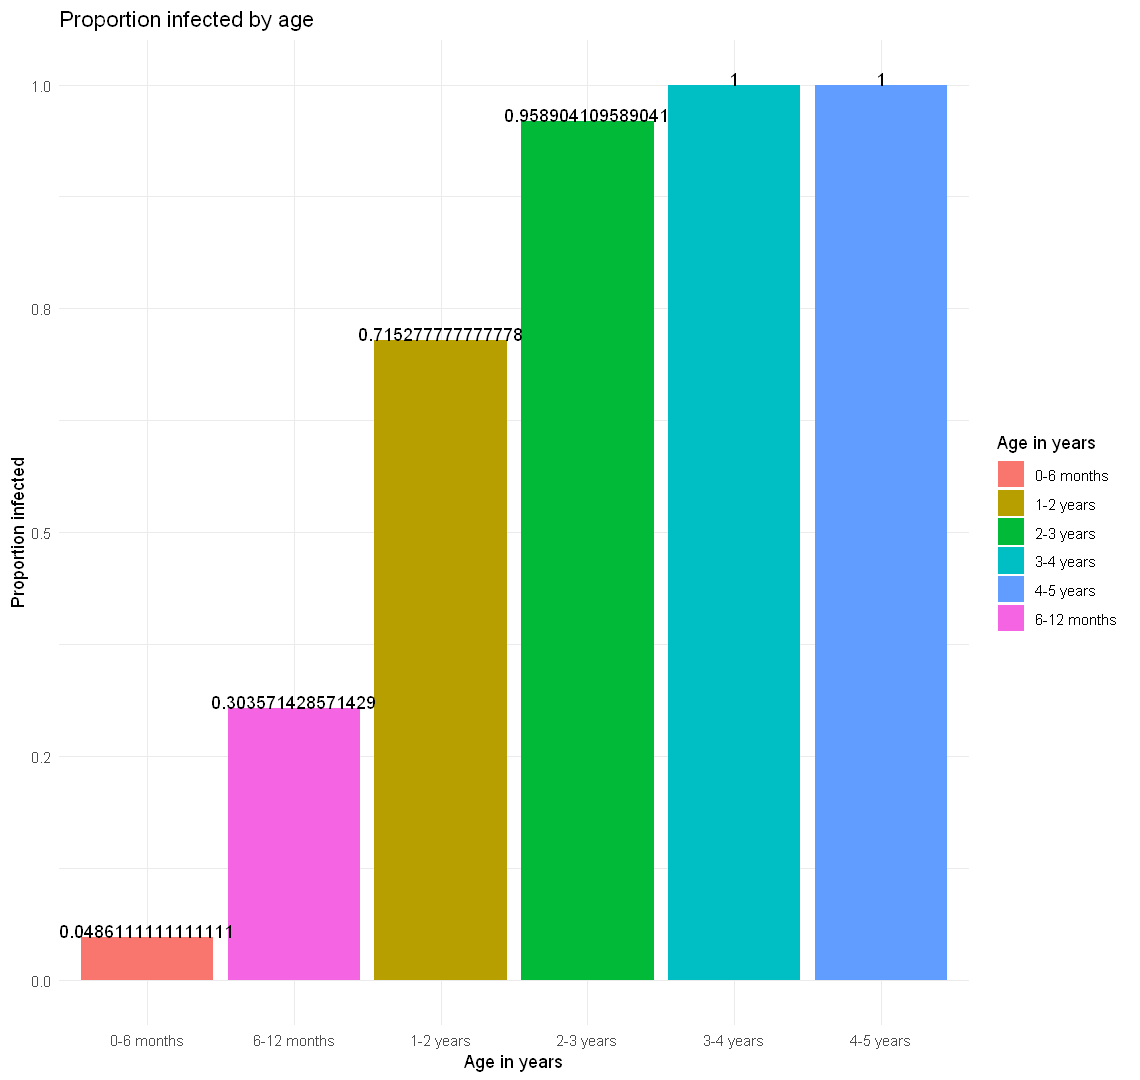

In [77]:
options(repr.plot.width = 9.5, repr.plot.height = 9)  
#png("infection_by_age.png")
p<-ggplot(data=dframe, aes(x=reorder(values, +infected), y=infected, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion infected by age",
        x ="Age in years", y = "Proportion infected") + scale_fill_discrete(name="Age in years") + geom_text(aes(label = infected), vjust = 0)
p
#dev.off()

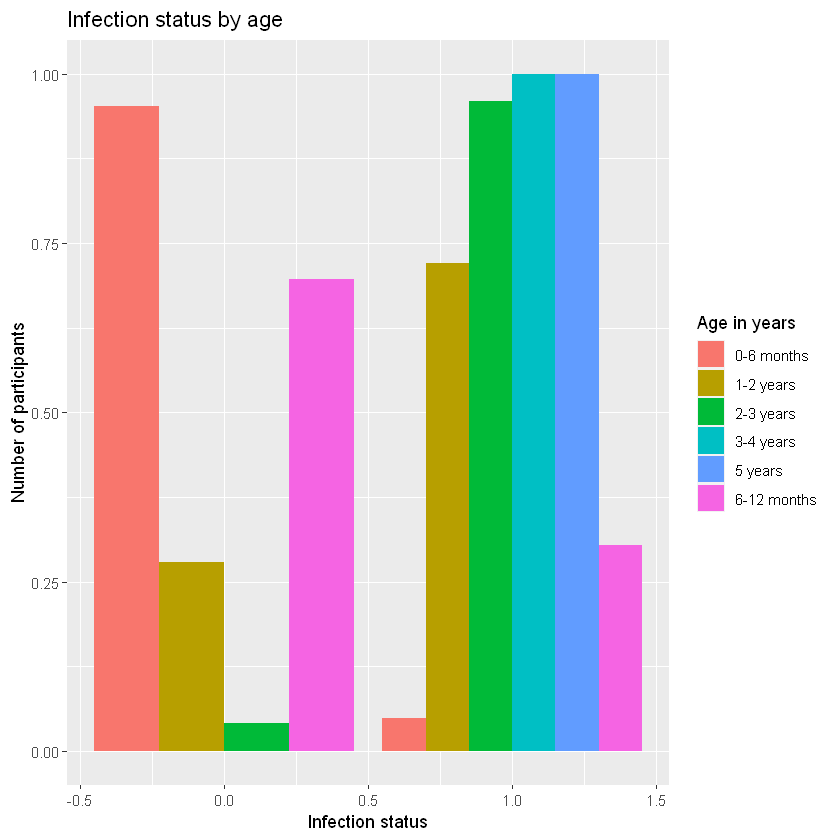

In [56]:
#png("infection_by_age.png")
ggplot(rsv.data, aes(x = infection, y=..prop.., fill=age_years)) + geom_bar(position="dodge") +
labs(title="Infection status by age",
        x ="Infection status", y = "Number of participants") + scale_fill_discrete(name="Age in years")
#dev.off()

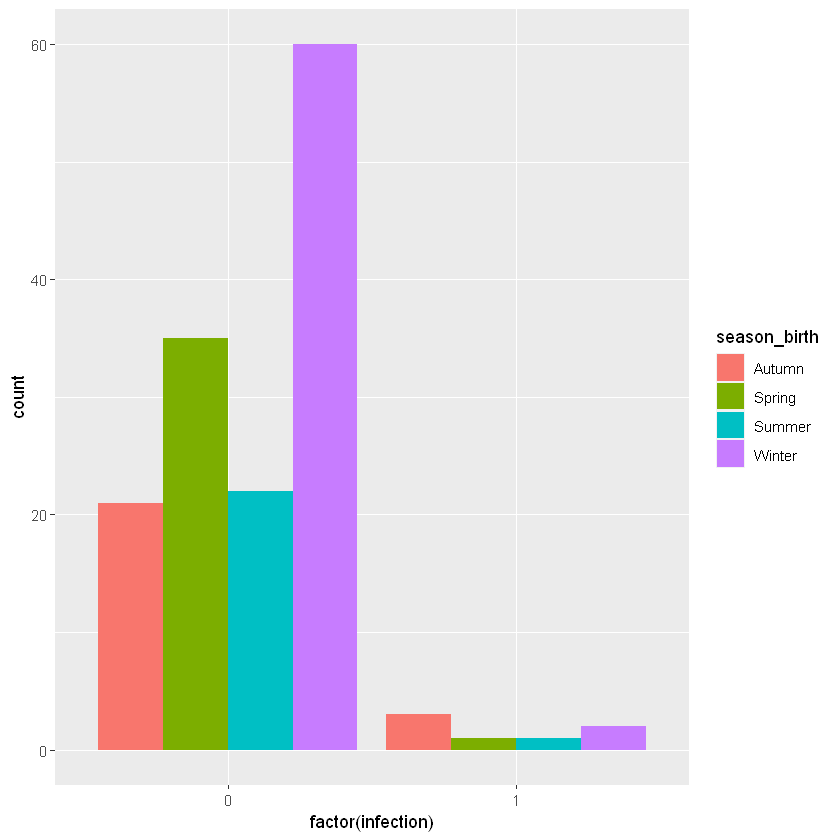

In [57]:
zero_one <- rsv.data%>%filter(age_years == '0-6 months')
zero_one%>%
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

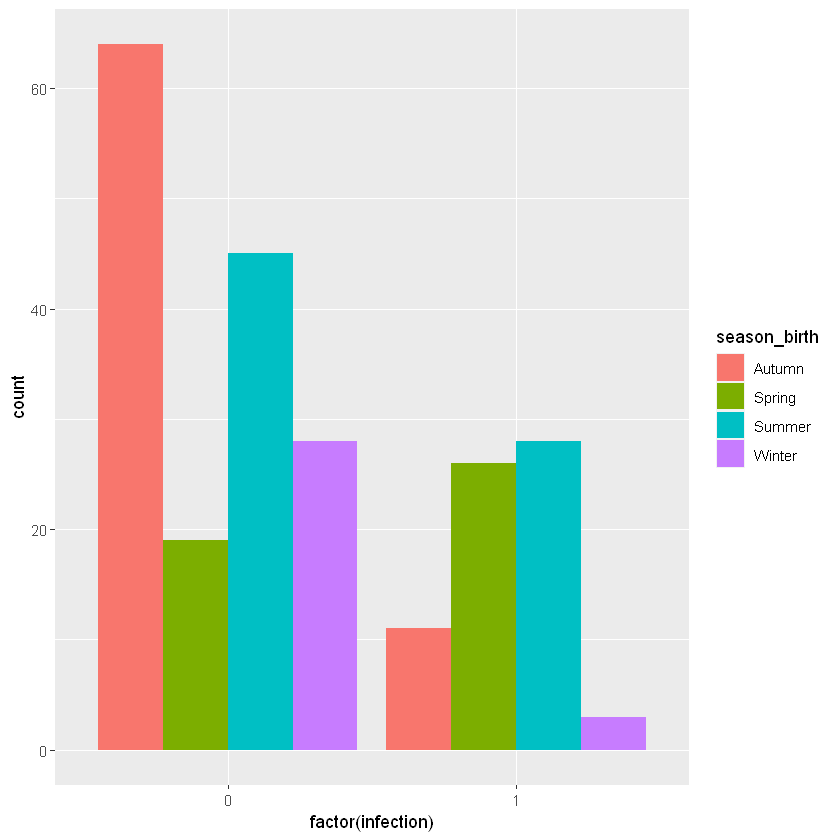

In [58]:
zero_one <- rsv.data%>%filter(age_years == '6-12 months')
zero_one%>%
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

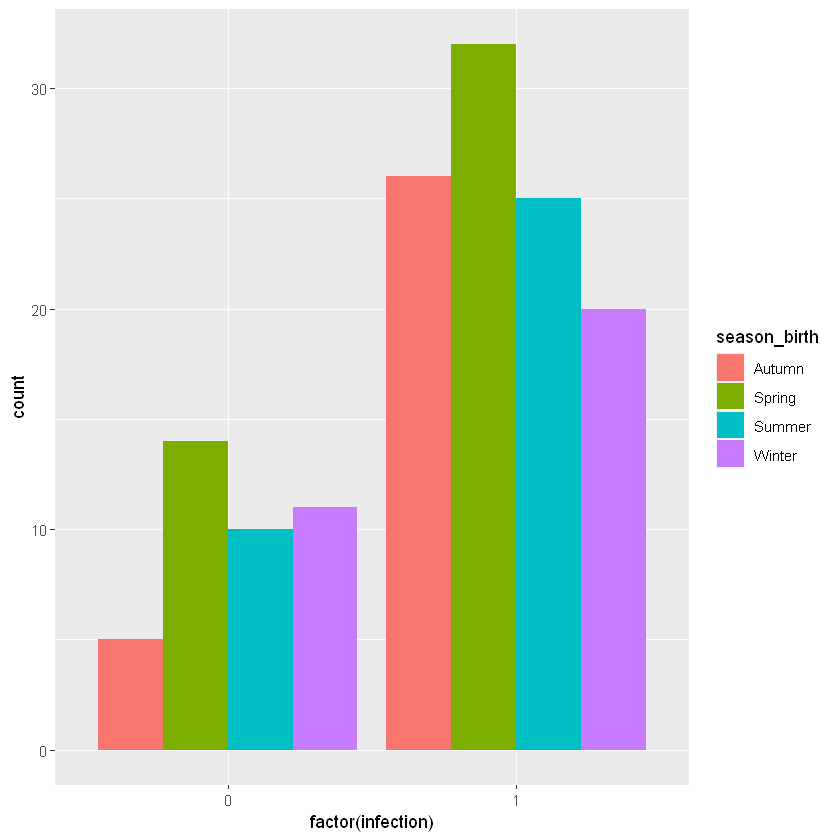

In [66]:
one_two <- rsv.data%>%filter(age_years == '1-2 years')
one_two%>%
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

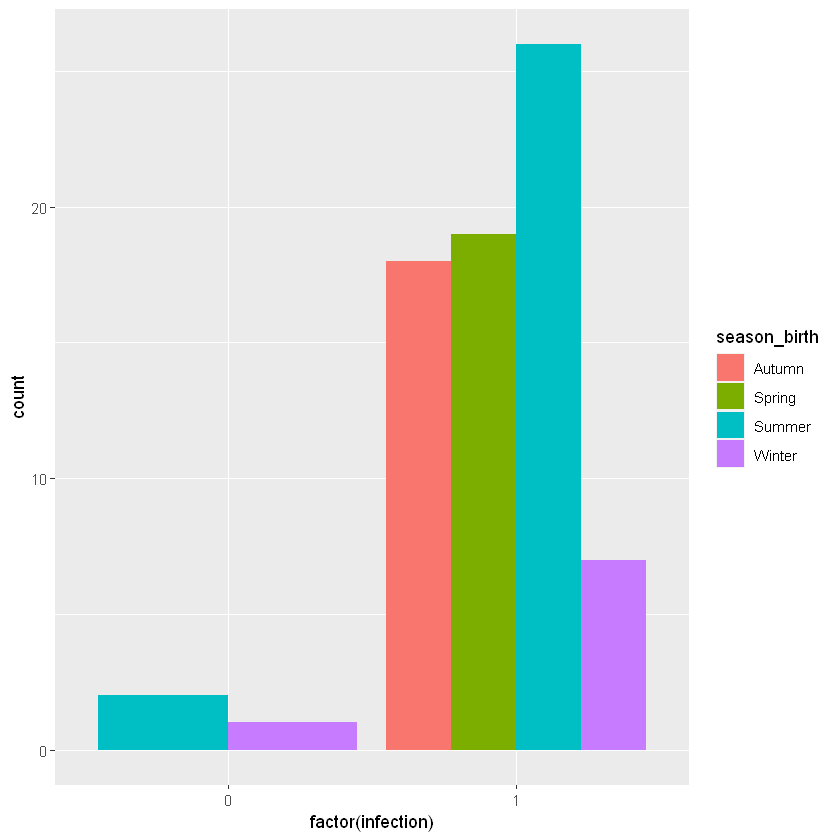

In [65]:
two_three <- rsv.data%>%filter(age_years == '2-3 years')
two_three%>%
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

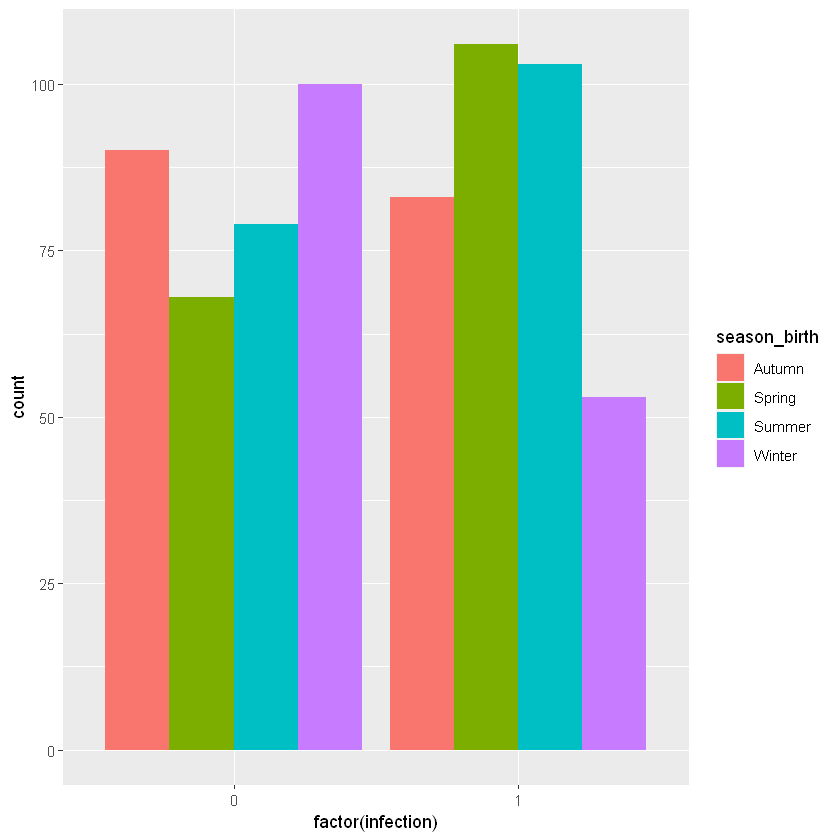

In [57]:
rsv.data %>% 
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

,values,infected
,<chr>,<dbl>
Autumn,Autumn,0.480
Spring,Spring,0.609
Summer,Summer,0.566
Winter,Winter,0.346


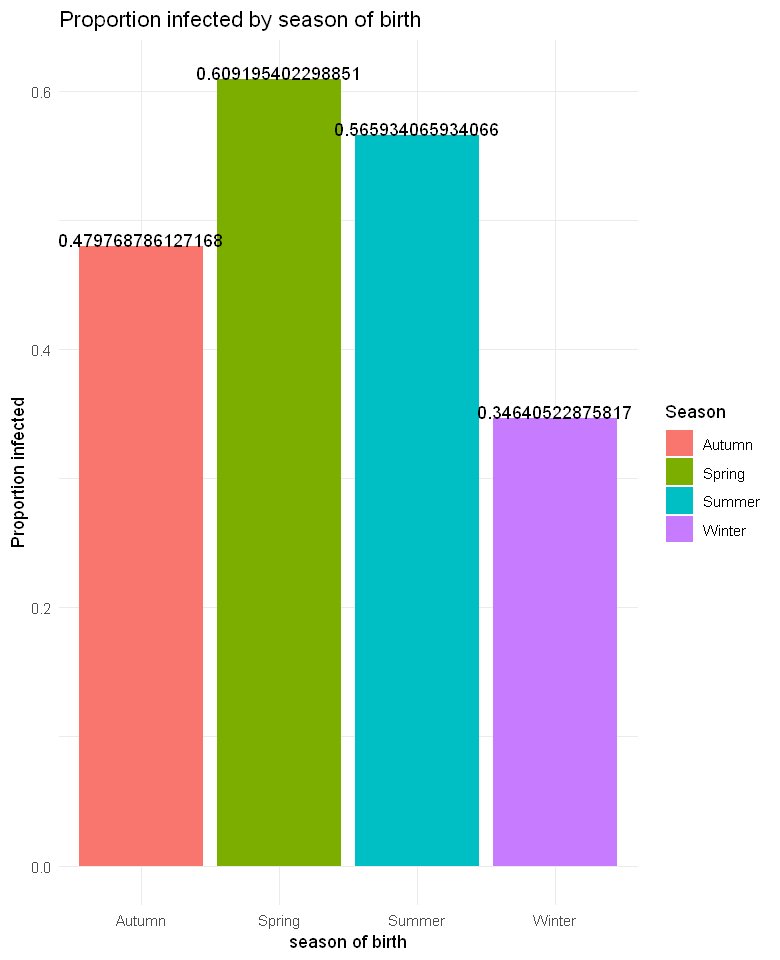

In [10]:
tab <- table(rsv.data$season_birth, rsv.data$infection)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), infected=ptab[,2])
dframe
options(repr.plot.width = 6.5, repr.plot.height = 8)
#png("infection_by_season.png")
p<-ggplot(data=dframe, aes(x=values, y=infected, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion infected by season of birth",
        x ="season of birth", y = "Proportion infected") + scale_fill_discrete(name="Season") + geom_text(aes(label = infected), vjust = 0)
p
#dev.off()

In [15]:
# Load the library.
library("MASS")
coucou <- subset(rsv.data, season_birth == "Winter")
coucou2 <- subset(rsv.data, season_birth == "Autumn")
coucou <- rbind (coucou, coucou2)
# Create a table with the needed variables.
car.data = table(coucou$season_birth, coucou$infection) 
print(car.data)

# Perform the Chi-Square test.
print(chisq.test(car.data))

        
           0   1
  Autumn  90  83
  Winter 100  53

	Pearson's Chi-squared test with Yates' continuity correction

data:  car.data
X-squared = 5, df = 1, p-value = 0.02



**Ig Distribution by age**

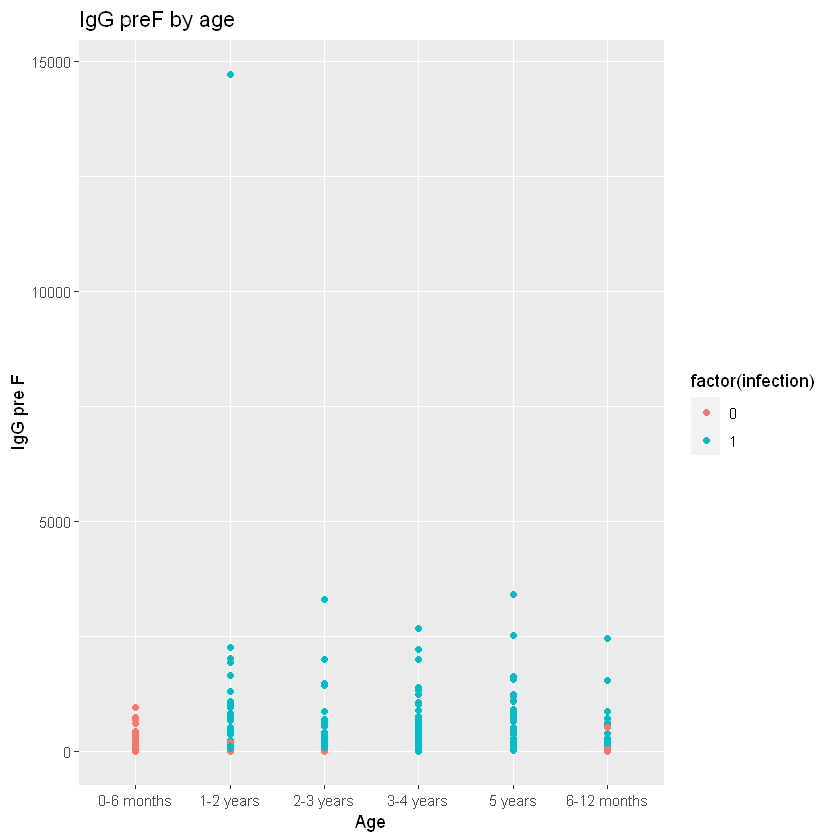

In [59]:
ggplot(rsv.data, aes(x = age_years, y=IgG_PreF)) + geom_point(aes(color = factor(infection))) +
labs(title="IgG preF by age",
        x ="Age", y = "IgG pre F")

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


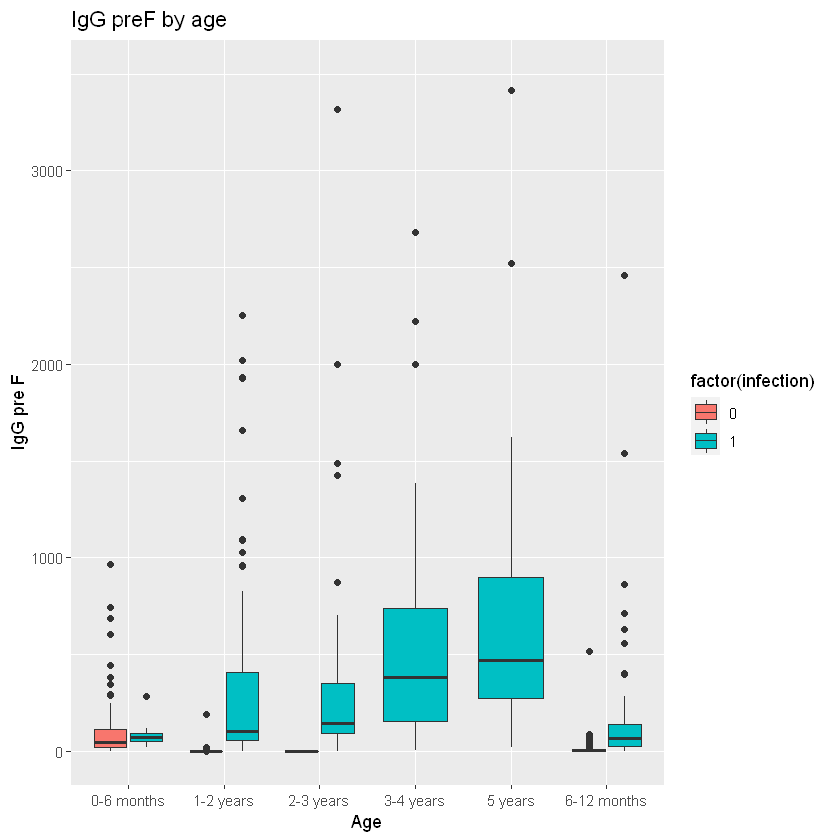

In [60]:
ggplot(rsv.data,aes(x=age_years,y=IgG_PreF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG preF by age",
        x ="Age", y = "IgG pre F") +
ylim(0,3500)

Warning message:
"Removed 187 rows containing non-finite values (stat_boxplot)."


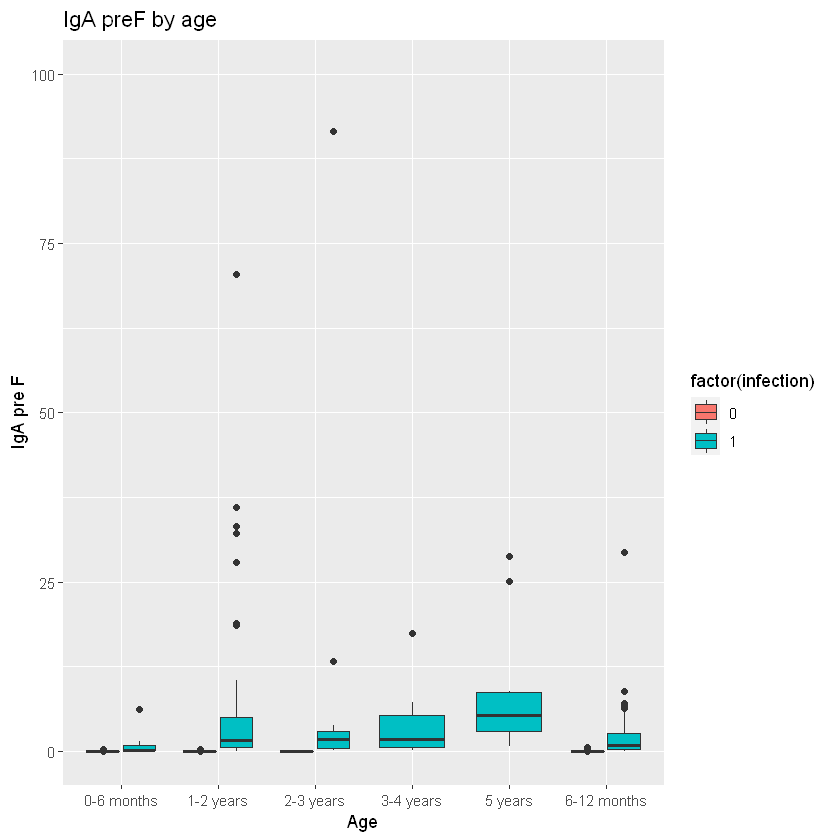

In [61]:
ggplot(rsv.data,aes(x=age_years,y=IgA_PreF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA preF by age",
        x ="Age", y = "IgA pre F") +
ylim(0, 100)

Warning message:
"Removed 28 rows containing non-finite values (stat_boxplot)."


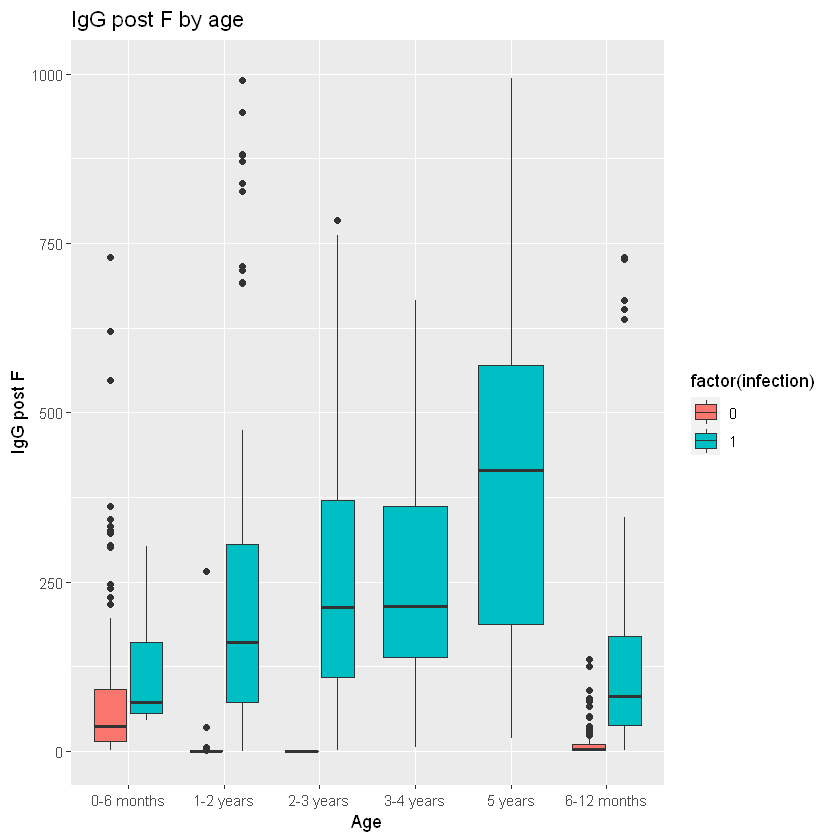

In [62]:
ggplot(rsv.data,aes(x=age_years,y=IgG_PostF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG post F by age",
        x ="Age", y = "IgG post F") +
ylim(0, 1000)

Warning message:
"Removed 186 rows containing non-finite values (stat_boxplot)."


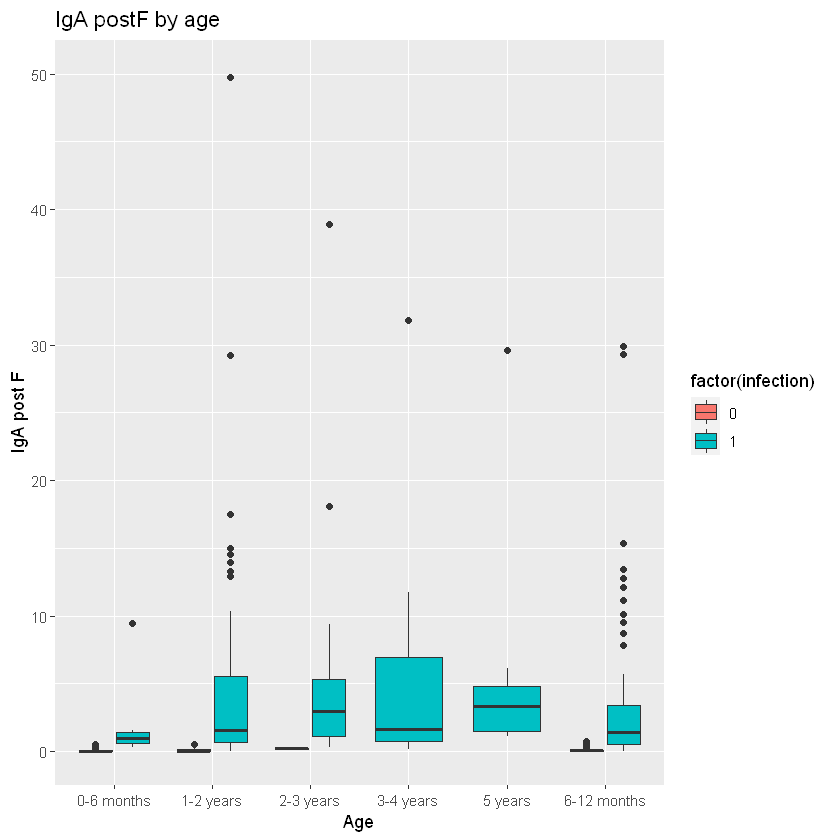

In [63]:
ggplot(rsv.data,aes(x=age_years,y=IgA_PostF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA postF by age",
        x ="Age", y = "IgA post F") +
ylim (0,50)

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


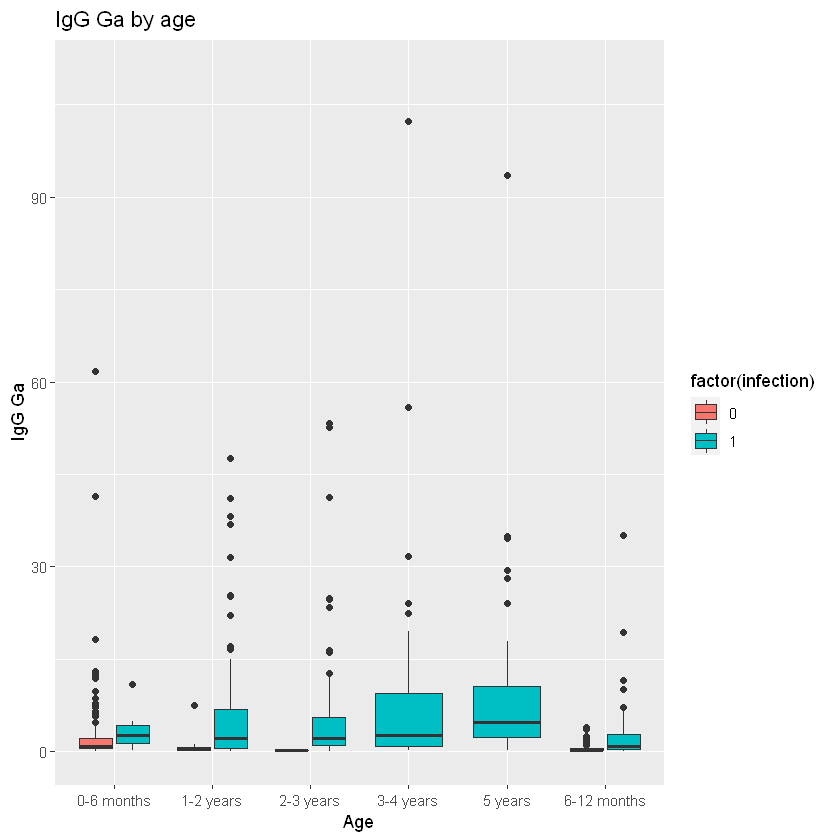

In [64]:
ggplot(rsv.data,aes(x=age_years,y=IgG_Ga,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG Ga by age",
        x ="Age", y = "IgG Ga") +
ylim (0, 110)

Warning message:
"Removed 187 rows containing non-finite values (stat_boxplot)."


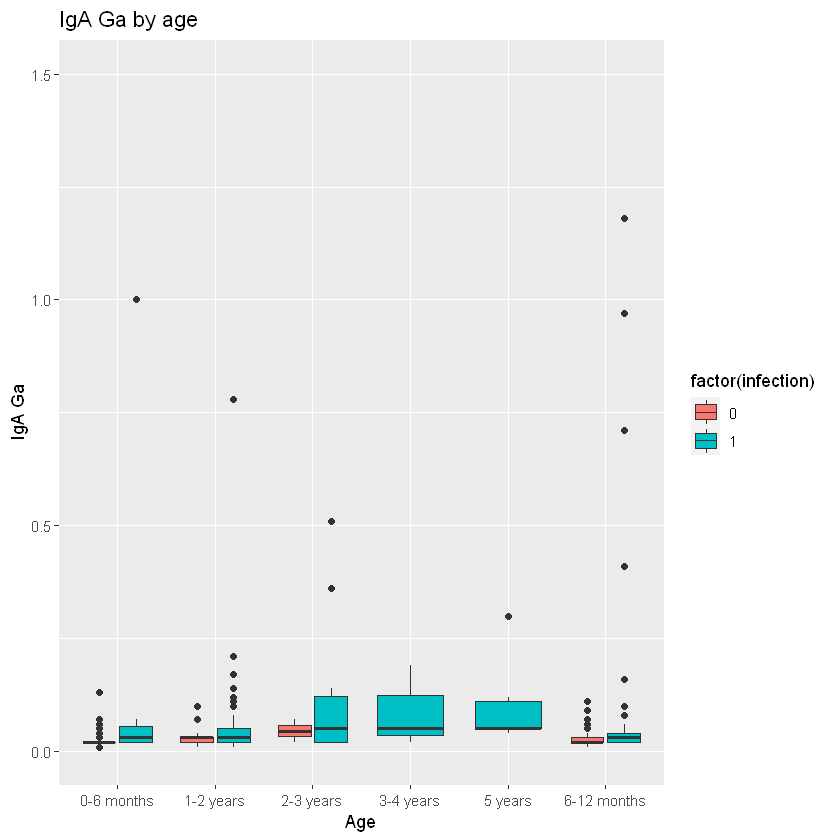

In [65]:
ggplot(rsv.data,aes(x=age_years,y=IgA_Ga,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA Ga by age",
        x ="Age", y = "IgA Ga") +
ylim (0,1.5)

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


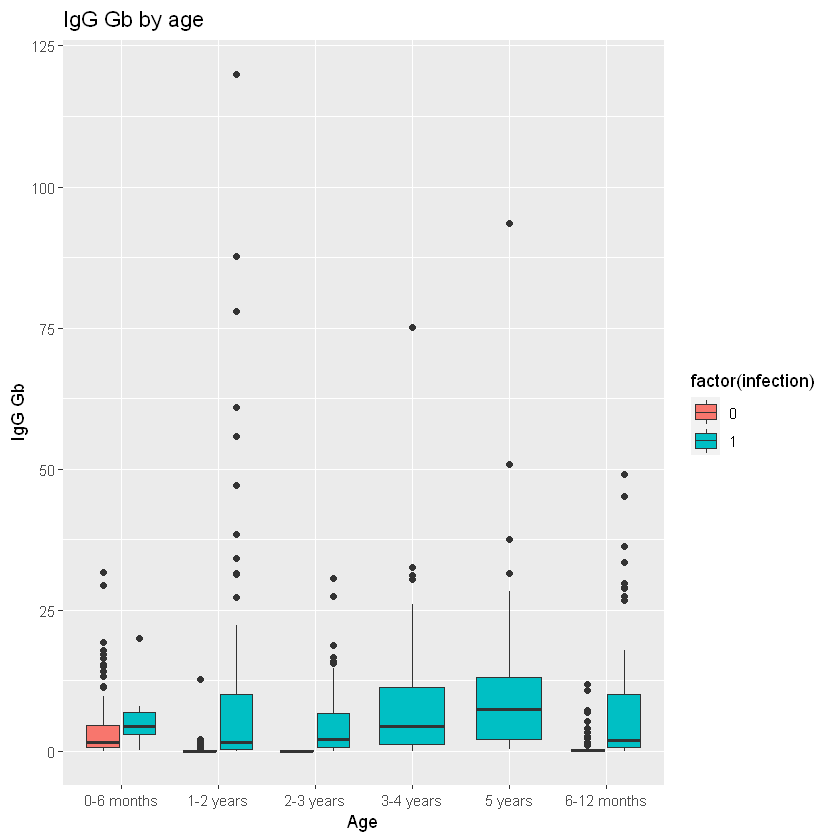

In [66]:
ggplot(rsv.data,aes(x=age_years,y=IgG_Gb,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG Gb by age",
        x ="Age", y = "IgG Gb") +
ylim (0,120)

Warning message:
"Removed 186 rows containing non-finite values (stat_boxplot)."


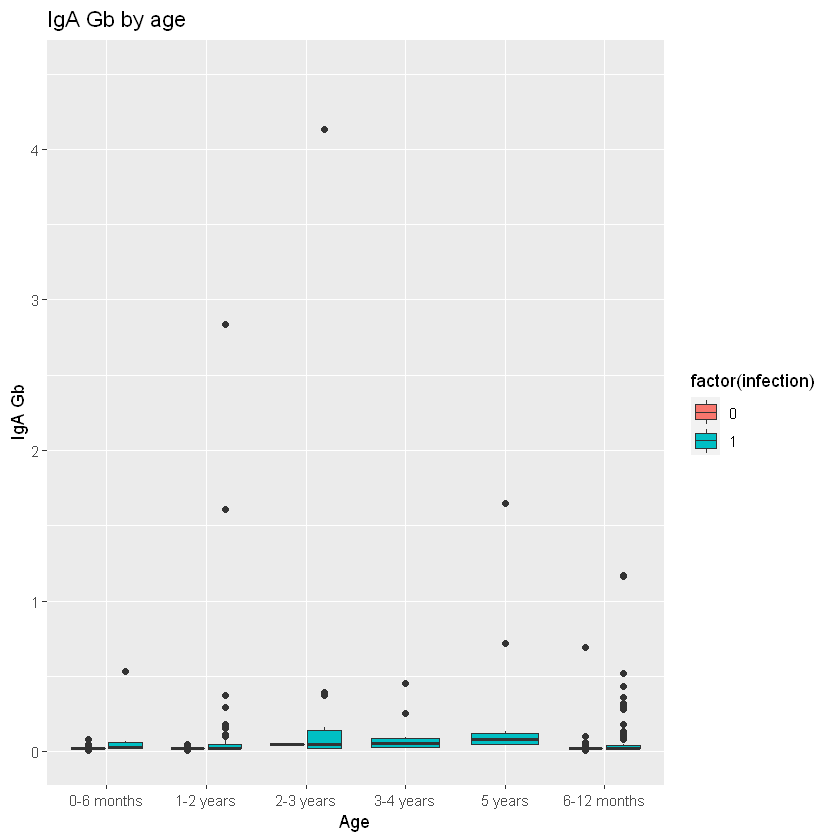

In [67]:
ggplot(rsv.data,aes(x=age_years,y=IgA_Gb,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA Gb by age",
        x ="Age", y = "IgA Gb") +
ylim (0,4.5)

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."


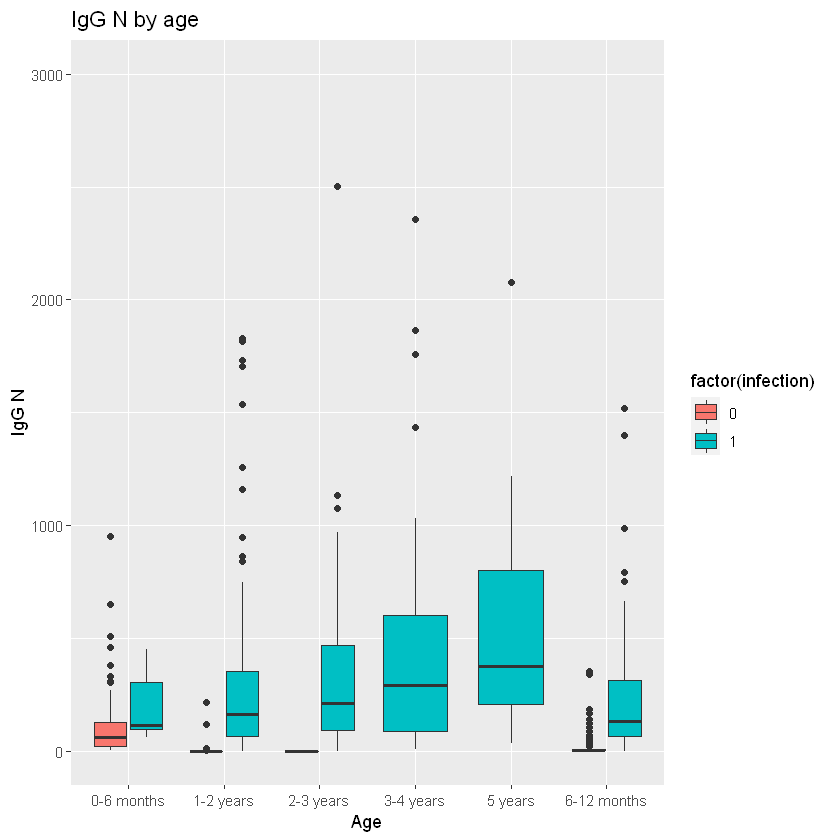

In [68]:
ggplot(rsv.data,aes(x=age_years,y=IgG_N,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG N by age",
        x ="Age", y = "IgG N") +
ylim (0, 3000)

**Number of contacts by age**

***Total contacts***

Warning message:
"Removed 98 rows containing missing values (geom_point)."


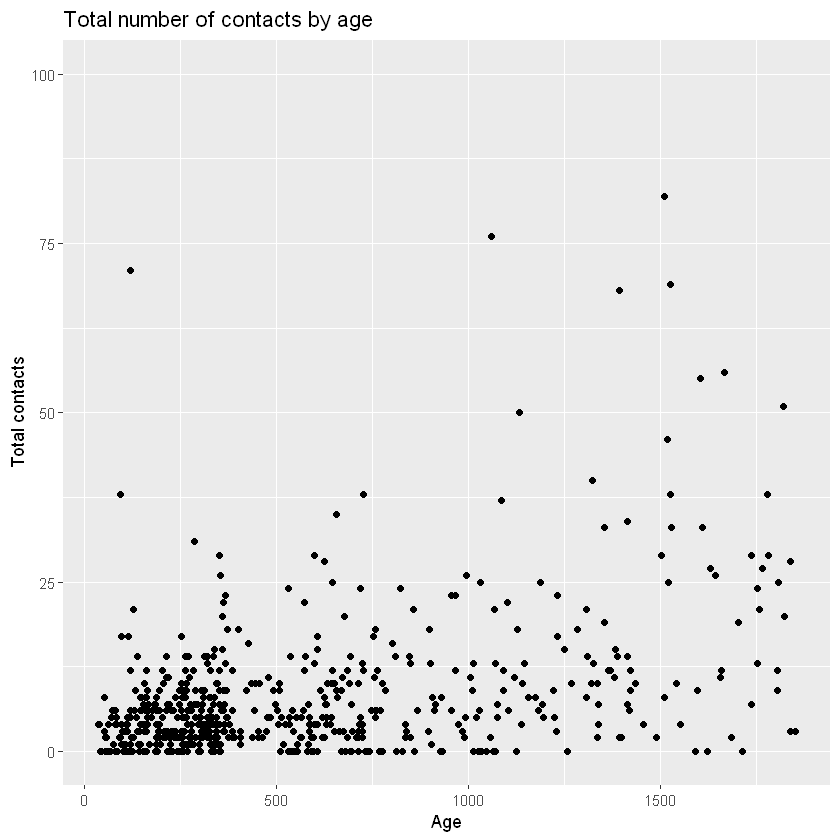

In [69]:
ggplot(rsv.data, aes(x = age_days, y = contacttotal)) +
    geom_point() +
labs(title="Total number of contacts by age",
        x ="Age", y = "Total contacts") +
ylim (0, 100)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 98 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 98 rows containing missing values (geom_point)."


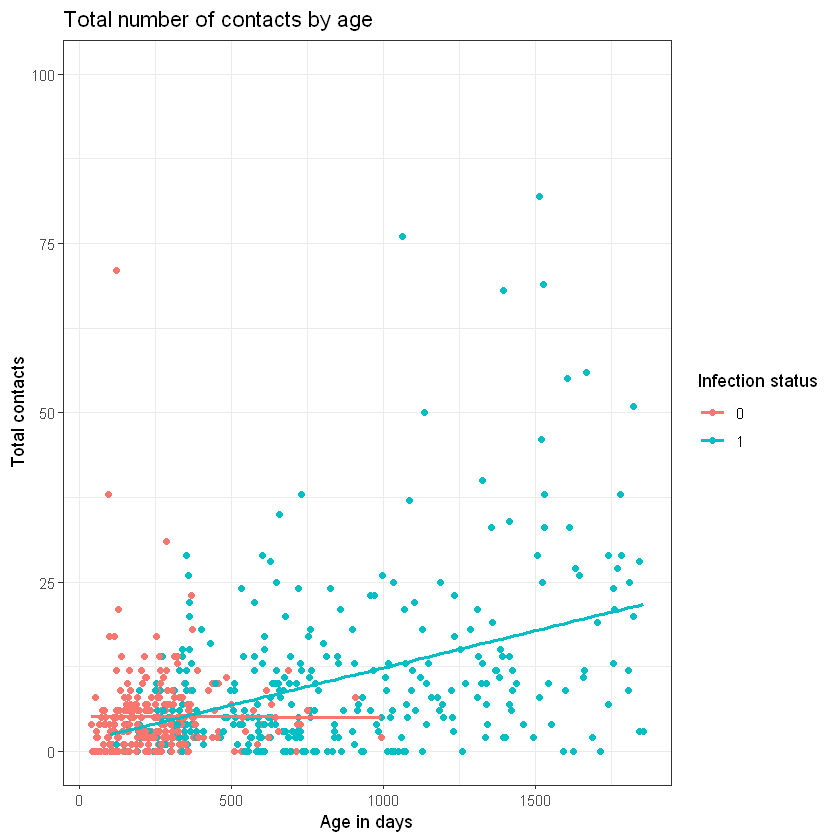

In [70]:
#png("contacts_by_age.png")
rsv.data %>% 
  ggplot(aes(x = age_days, y = contacttotal, color = factor(infection))) + 
  geom_point() +
  geom_smooth(method = lm, se = F) +
  theme_bw() +
  ylim (0, 100) +
labs(title="Total number of contacts by age",
        x ="Age in days", y = "Total contacts", color = "Infection status") 
#dev.off()

In [21]:
summ_contact <- rsv.data %>% 
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,5.136842,4.0,8.670825,0,71
12-18 months,9.017857,5.0,19.964050,0,150
18-24 months,7.696203,5.0,8.146660,0,38
24-30 months,7.756757,6.0,6.824813,0,24
30-36 months,10.571429,6.0,14.637353,0,76
36-42 months,19.791667,9.5,39.820226,0,200
42-48 months,14.862069,12.0,13.819562,2,68
48-54 months,27.647059,27.0,24.639757,0,82
54-60 months,21.550000,20.5,14.680725,0,56


In [72]:
write.csv(summ_contact, "total_contacts_by_age.csv", row.names = FALSE)

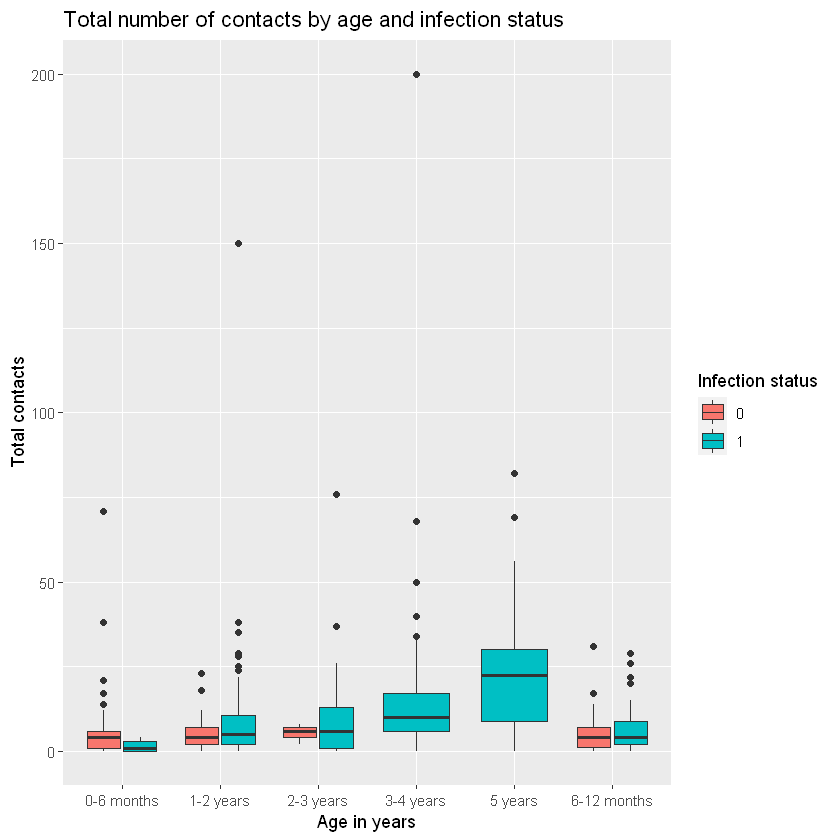

In [73]:
#png("boxplot_contacts_by_age.png")
rsv.data %>% filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
ggplot(aes(x=age_years,y=contacttotal,fill=factor(infection)))+geom_boxplot()+
labs(title="Total number of contacts by age and infection status",
        x ="Age in years", y = "Total contacts", fill = "Infection status") 
#+ ylim(0, 100)
#dev.off()

In [74]:
#number of contacts per age group in infected children
summ_contact <- rsv.data %>% 
filter(infection == 1)%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,1.600000,1.0,1.816590,0,4
1-2 years,9.347368,5.0,16.588107,0,150
2-3 years,9.289855,6.0,11.530141,0,76
3-4 years,17.094340,10.0,28.466082,0,200
5 years,23.375000,22.5,19.636031,0,82
6-12 months,6.403509,4.0,6.436114,0,29


In [75]:
#number of contacts per age group in uninfected children
summ_contact <- rsv.data %>% 
filter(infection == 0)%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,5.351648,4,8.813340,0,71
1-2 years,5.589744,4,4.859705,0,23
2-3 years,5.333333,6,3.055050,2,8
6-12 months,4.813433,4,4.477459,0,31


**Contacts by season of birth**

In [10]:
summ_contact <- rsv.data %>% 
filter(complete.cases(contacttotal)) %>% 
group_by(season_birth) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

season_birth,mean,median,sd,min,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Autumn,8.184932,5,15.342977,0,150
Spring,11.947368,5,20.804606,0,200
Summer,7.518987,5,8.930533,0,69
Winter,7.000000,5,7.448011,0,33


In [12]:
summ_contact <- rsv.data %>% 
filter(season_birth == 'Spring')%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))


#summ_contact <- summ_contact[c(1,10,2:9),]
summ_contact <- summ_contact[c(1,6, 2:5),]
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,7.928571,4,14.570210,0,71
6-12 months,7.128205,5,6.333617,0,29
1-2 years,8.309524,5,8.863430,0,38
2-3 years,10.277778,7,17.401168,0,76
3-4 years,31.000000,18,56.619785,3,200
4-5 years,31.500000,28,22.128123,0,82


In [13]:
summ_contact <- rsv.data %>% 
filter(season_birth == 'Summer')%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))

#summ_contact <- summ_contact[c(1,10,2:9),]
summ_contact <- summ_contact[c(1,6, 2:5),]
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,2.461538,1.0,3.454837,0,12
6-12 months,4.816667,3.5,4.519231,0,22
1-2 years,7.411765,6.0,6.372848,0,29
2-3 years,9.892857,6.0,9.742383,0,37
3-4 years,11.133333,10.0,9.364574,0,40
4-5 years,21.375000,18.5,21.980105,0,69


In [14]:
summ_contact <- rsv.data %>% 
filter(season_birth == 'Autumn')%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
#summ_contact <- summ_contact[c(1,10,2:9),]
summ_contact <- summ_contact[c(1,6, 2:5),]
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,4.454545,4.0,2.381749,0,8
6-12 months,4.730159,3.0,5.115462,0,31
1-2 years,10.366667,4.5,26.846284,0,150
2-3 years,8.111111,6.0,8.115989,0,26
3-4 years,18.266667,10.0,19.326025,2,68
4-5 years,13.000000,9.0,17.406895,0,56


In [15]:
summ_contact <- rsv.data %>% 
filter(season_birth == 'Winter')%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
#summ_contact <- summ_contact[c(1,10,2:9),]
summ_contact <- summ_contact[c(1,6, 2:5),]
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,4.302326,4.0,4.334441,0,21
6-12 months,5.000000,4.0,4.503967,0,20
1-2 years,6.931034,4.0,7.279772,0,28
2-3 years,6.125000,6.0,4.517822,0,13
3-4 years,10.333333,9.5,5.974694,0,21
4-5 years,22.888889,27.0,10.833333,2,33


***Contacts aged 0-4 years***

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 178 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 178 rows containing missing values (geom_point)."


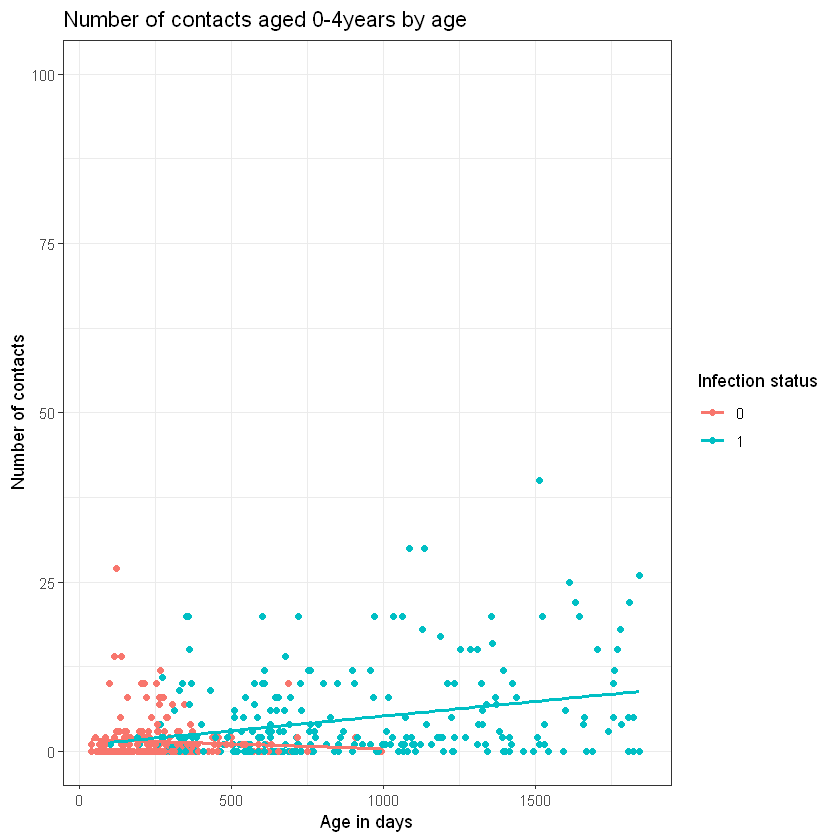

In [76]:
#png("contacts_0-4_by_age.png")
rsv.data %>% 
  ggplot(aes(x = age_days, y = contact04, color = factor(infection))) + 
  geom_point() +
  geom_smooth(method = lm, se = F) +
  theme_bw() +
  ylim (0, 100) +
labs(title="Number of contacts aged 0-4years by age",
        x ="Age in days", y = "Number of contacts", color = "Infection status") 
#dev.off()

In [77]:
summ_contact04 <- rsv.data %>% 
filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact04),
                  median = median(contact04),
                  sd = sd(contact04),
                  min = min(contact04),
                  max = max(contact04))
summ_contact04

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,1.617284,0.0,3.887698,0,27
1-2 years,2.586777,1.0,3.940536,0,20
2-3 years,4.303571,1.5,6.361588,0,30
3-4 years,5.956522,2.5,6.886239,0,30
5 years,9.062500,5.0,10.251475,0,40
6-12 months,1.886905,0.0,3.504361,0,20


In [78]:
write.csv(summ_contact04, "contacts_04_by_age.csv", row.names = FALSE)

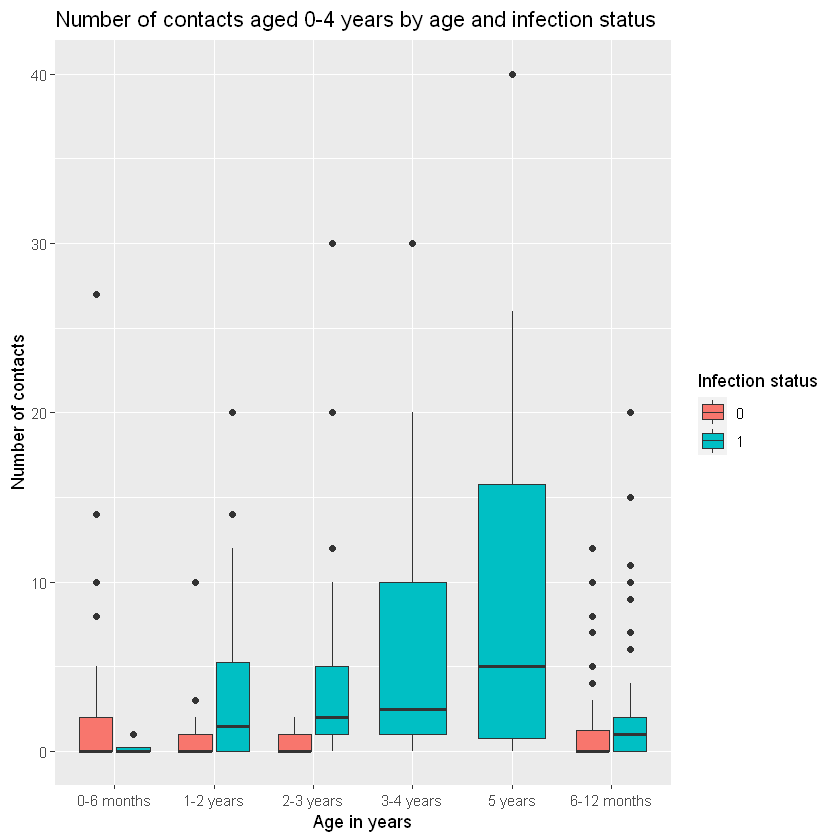

In [79]:
#png("boxplot_contacts_04_by_age.png")
rsv.data %>% filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
ggplot(aes(x=age_years,y=contact04,fill=factor(infection)))+geom_boxplot()+
labs(title="Number of contacts aged 0-4 years by age and infection status",
        x ="Age in years", y = "Number of contacts", fill = "Infection status") 
#dev.off()

In [80]:
#contacts 0-4 years in infected children
summ_contact04 <- rsv.data %>% 
filter(infection == 1)%>%
filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact04),
                  median = median(contact04),
                  sd = sd(contact04),
                  min = min(contact04),
                  max = max(contact04))
summ_contact04

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,0.250000,0.0,0.500000,0,1
1-2 years,3.333333,1.5,4.394228,0,20
2-3 years,4.509434,2.0,6.476652,0,30
3-4 years,5.956522,2.5,6.886239,0,30
5 years,9.062500,5.0,10.251475,0,40
6-12 months,2.750000,1.0,4.825890,0,20


In [81]:
#contacts 0-4 years in uninfected children
summ_contact04 <- rsv.data %>% 
filter(infection == 0)%>%
filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact04),
                  median = median(contact04),
                  sd = sd(contact04),
                  min = min(contact04),
                  max = max(contact04))
summ_contact04

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,1.6883117,0,3.974457,0,27
1-2 years,0.8918919,0,1.728580,0,10
2-3 years,0.6666667,0,1.154701,0,2
6-12 months,1.5000000,0,2.649036,0,12


***Contacts aged 5-9 years***

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 178 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 178 rows containing missing values (geom_point)."


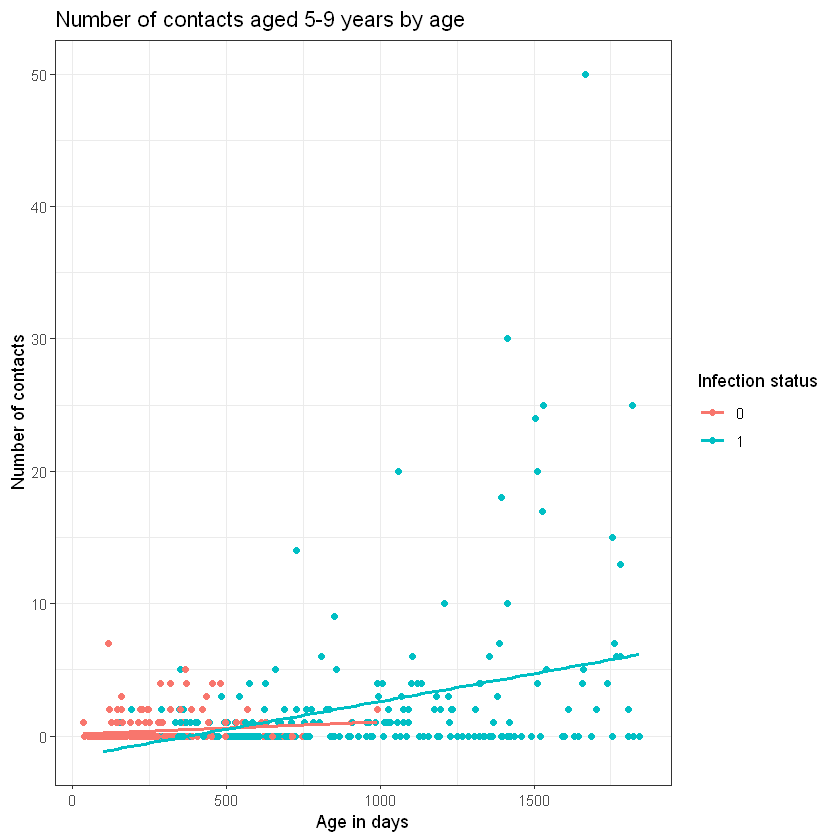

In [82]:
#png("contacts_59_by_age.png")
rsv.data %>% 
  ggplot(aes(x = age_days, y = contact59, color = factor(infection))) + 
  geom_point() +
  geom_smooth(method = lm, se = F) +
  theme_bw() +
labs(title="Number of contacts aged 5-9 years by age",
        x ="Age in days", y = "Number of contacts", color = "Infection status") 
#dev.off()

In [83]:
summ_contact59 <- rsv.data %>% 
filter(complete.cases(contact59)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact59),
                  median = median(contact59),
                  sd = sd(contact59),
                  min = min(contact59),
                  max = max(contact59))
summ_contact59

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,0.2839506,0.0,0.9385437,0,7
1-2 years,0.7272727,0.0,1.6733201,0,14
2-3 years,1.5535714,1.0,3.0506014,0,20
3-4 years,2.8043478,0.5,5.4021377,0,30
5 years,7.3750000,3.0,11.2156285,0,50
6-12 months,0.2857143,0.0,0.7749279,0,5


In [84]:
write.csv(summ_contact59, "contacts_59_by_age.csv", row.names = FALSE)

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


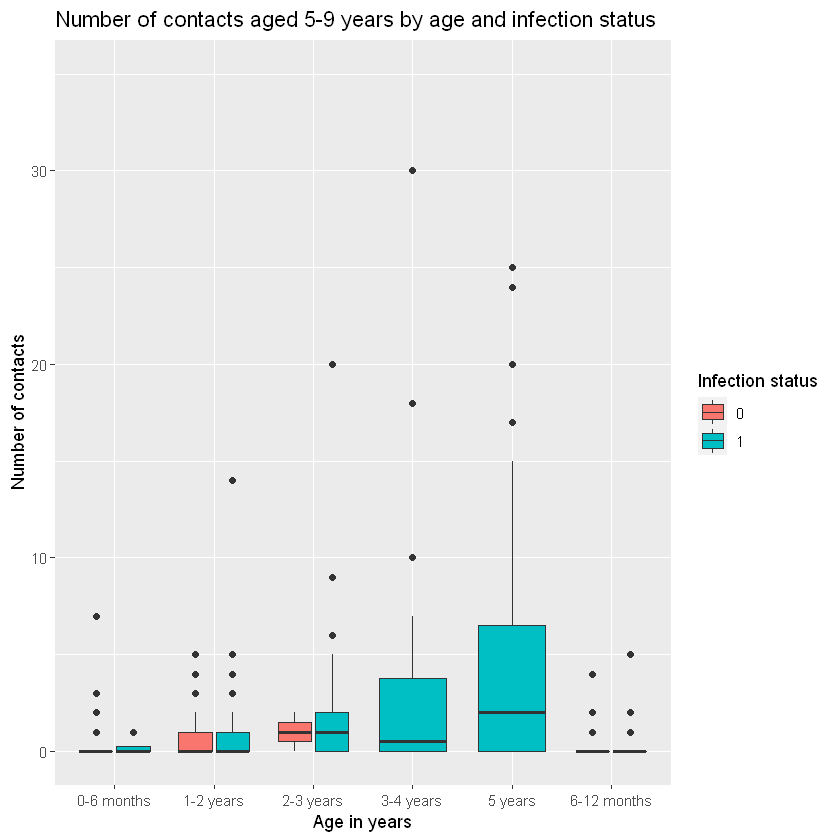

In [85]:
#png("boxplot_contacts_59_by_age.png")
rsv.data %>% filter(complete.cases(contact59)) %>% 
group_by(age_years) %>% 
ggplot(aes(x=age_years, y=contact59, fill=factor(infection))) + geom_boxplot()+
labs(title="Number of contacts aged 5-9 years by age and infection status",
        x ="Age in years", y = "Number of contacts", fill = "Infection status") + ylim(0, 35)
#dev.off()

In [86]:
#contacts aged 5-9 years among infected children
summ_contact59 <- rsv.data %>% 
filter(complete.cases(contact59)) %>% 
filter (infection == 1) %>%
group_by(age_years) %>% 
  summarise(mean = mean(contact59),
                  median = median(contact59),
                  sd = sd(contact59),
                  min = min(contact59),
                  max = max(contact59))
summ_contact59

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,0.2500000,0.0,0.5000000,0,1
1-2 years,0.6666667,0.0,1.7789487,0,14
2-3 years,1.5849057,1.0,3.1282458,0,20
3-4 years,2.8043478,0.5,5.4021377,0,30
5 years,7.3750000,3.0,11.2156285,0,50
6-12 months,0.2884615,0.0,0.8708017,0,5


In [87]:
#contacts aged 5-9 years among uninfected children
summ_contact59 <- rsv.data %>% 
filter(complete.cases(contact59)) %>% 
filter (infection == 0) %>%
group_by(age_years) %>% 
  summarise(mean = mean(contact59),
                  median = median(contact59),
                  sd = sd(contact59),
                  min = min(contact59),
                  max = max(contact59))
summ_contact59

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,0.2857143,0,0.9577543,0,7
1-2 years,0.8648649,0,1.4173951,0,5
2-3 years,1.0000000,1,1.0000000,0,2
6-12 months,0.2844828,0,0.7319543,0,4


**Proportion attending day care by age**

,values,daycare
,<chr>,<dbl>
0-6 months,0-6 months,0.17857
6-12 months,6-12 months,0.40187
12-18 months,12-18 months,0.37288
18-24 months,18-24 months,0.43210
24-30 months,24-30 months,0.62162
30-36 months,30-36 months,0.73529
36-42 months,36-42 months,0.78261
42-48 months,42-48 months,0.93548
48-54 months,48-54 months,0.23529


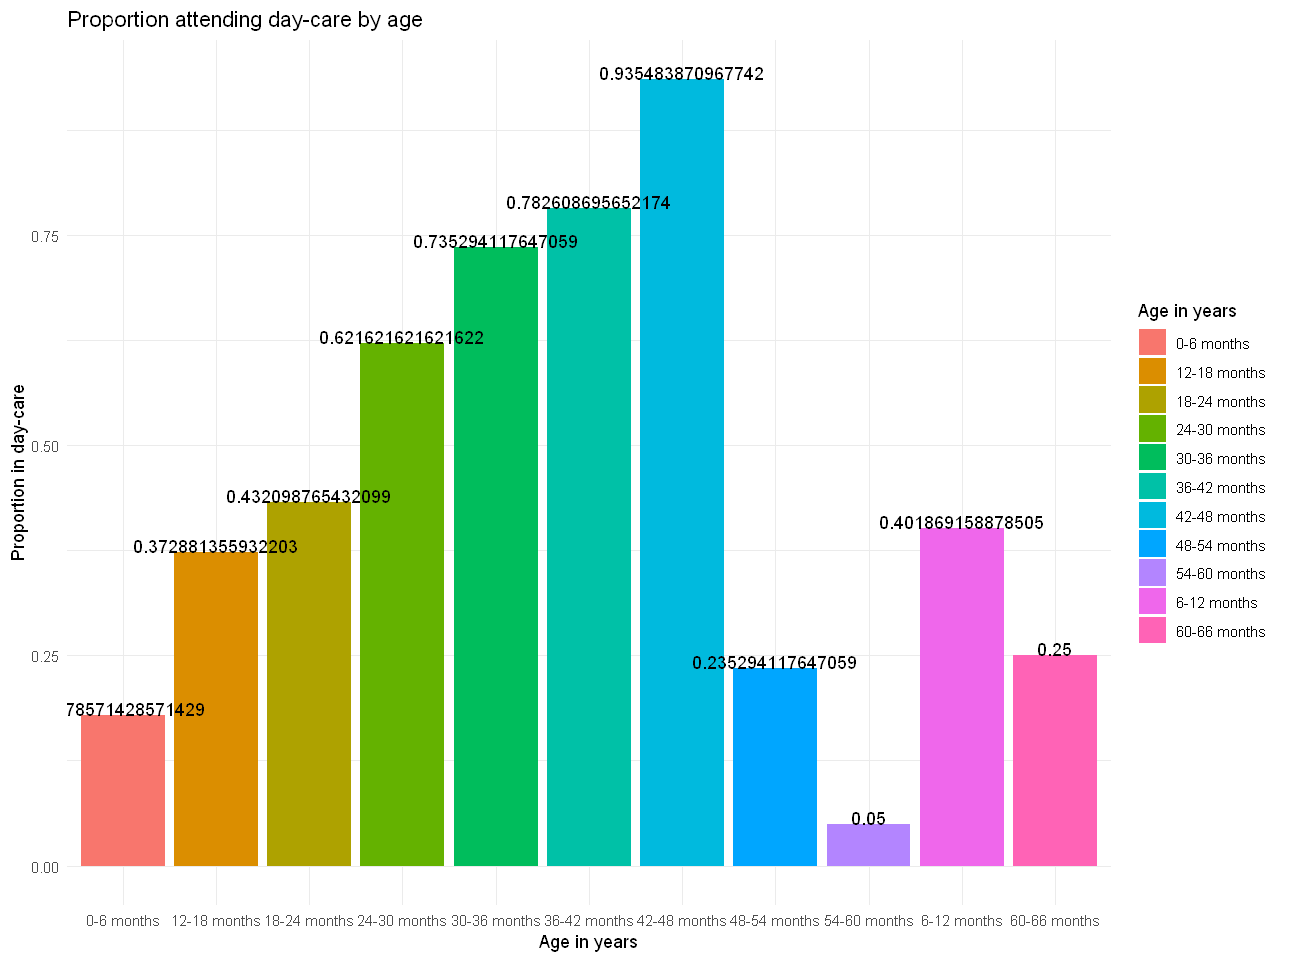

In [7]:
options(digits = 5)
tab <- table(rsv.data$age_years, rsv.data$Nursery)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), daycare=ptab[,2])
dframe <- dframe[c(1,10,2:9,11), ]
#dframe$values <- factor(dframe$values, levels = c('0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '4-5 years'))
dframe
options(repr.plot.width = 10.75, repr.plot.height = 8)
#png("daycare_by_age.png")
p<-ggplot(data=dframe, aes(x=values, y=daycare, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion attending day-care by age",
        x ="Age in years", y = "Proportion in day-care") + scale_fill_discrete(name="Age in years") + geom_text(aes(label = daycare), vjust = 0)
p
#dev.off()

In [115]:
#Proportion infected attended daycare
infected <- subset(rsv.data, infection == 1)
tab <- table(infected$age_years, infected$Nursery)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), daycare=ptab[,2])
dframe <- dframe[c(1,6,2:5), ]
dframe

,values,daycare
,<chr>,<dbl>
0-6 months,0-6 months,0.4000000
6-12 months,6-12 months,0.5454545
1-2 years,1-2 years,0.4950495
2-3 years,2-3 years,0.6764706
3-4 years,3-4 years,0.8703704
5 years,5 years,0.1463415


In [116]:
inf <- c(TRUE,TRUE,TRUE,TRUE,TRUE, TRUE)
dframe <-cbind(dframe, inf)
dframe

,values,daycare,inf
,<chr>,<dbl>,<lgl>
0-6 months,0-6 months,0.4000000,TRUE
6-12 months,6-12 months,0.5454545,TRUE
1-2 years,1-2 years,0.4950495,TRUE
2-3 years,2-3 years,0.6764706,TRUE
3-4 years,3-4 years,0.8703704,TRUE
5 years,5 years,0.1463415,TRUE


In [111]:
#Proportion uninfected attended daycare
infected <- subset(rsv.data, infection == 0)
tab <- table(infected$age_years, infected$Nursery)
ptab <- prop.table(tab, margin=1)
dframe1 <- data.frame(values=rownames(tab), daycare=ptab[,2])
dframe1 <- dframe1[c(1,6,2:5), ]
dframe1

,values,daycare
,<chr>,<dbl>
0-6 months,0-6 months,0.1703704
6-12 months,6-12 months,0.3355705
1-2 years,1-2 years,0.1842105
2-3 years,2-3 years,0.6666667
3-4 years,3-4 years,NaN
5 years,5 years,NaN


In [112]:
for (d in seq_along(dframe1$values)){
    if (dframe1$daycare[d] == 'NaN'){
        dframe1$daycare[d] <- 0
        }
    }

In [113]:
inf <- c(FALSE,FALSE,FALSE,FALSE,FALSE, FALSE)
dframe1 <-cbind(dframe1, inf)
dframe1

,values,daycare,inf
,<chr>,<dbl>,<lgl>
0-6 months,0-6 months,0.1703704,FALSE
6-12 months,6-12 months,0.3355705,FALSE
1-2 years,1-2 years,0.1842105,FALSE
2-3 years,2-3 years,0.6666667,FALSE
3-4 years,3-4 years,0.0000000,FALSE
5 years,5 years,0.0000000,FALSE


In [117]:
dframe <-rbind(dframe, dframe1)
dframe

,values,daycare,inf
,<chr>,<dbl>,<lgl>
0-6 months,0-6 months,0.4000000,TRUE
6-12 months,6-12 months,0.5454545,TRUE
1-2 years,1-2 years,0.4950495,TRUE
2-3 years,2-3 years,0.6764706,TRUE
3-4 years,3-4 years,0.8703704,TRUE
5 years,5 years,0.1463415,TRUE
0-6 months1,0-6 months,0.1703704,FALSE
6-12 months1,6-12 months,0.3355705,FALSE
1-2 years1,1-2 years,0.1842105,FALSE


In [119]:
dframe$values <- factor(dframe$values, levels = c('0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '5 years',
                                                 '0-6 months1', '6-12 months1', '1-2 years1', '2-3 years1', '3-4 years1', '5 years1'))

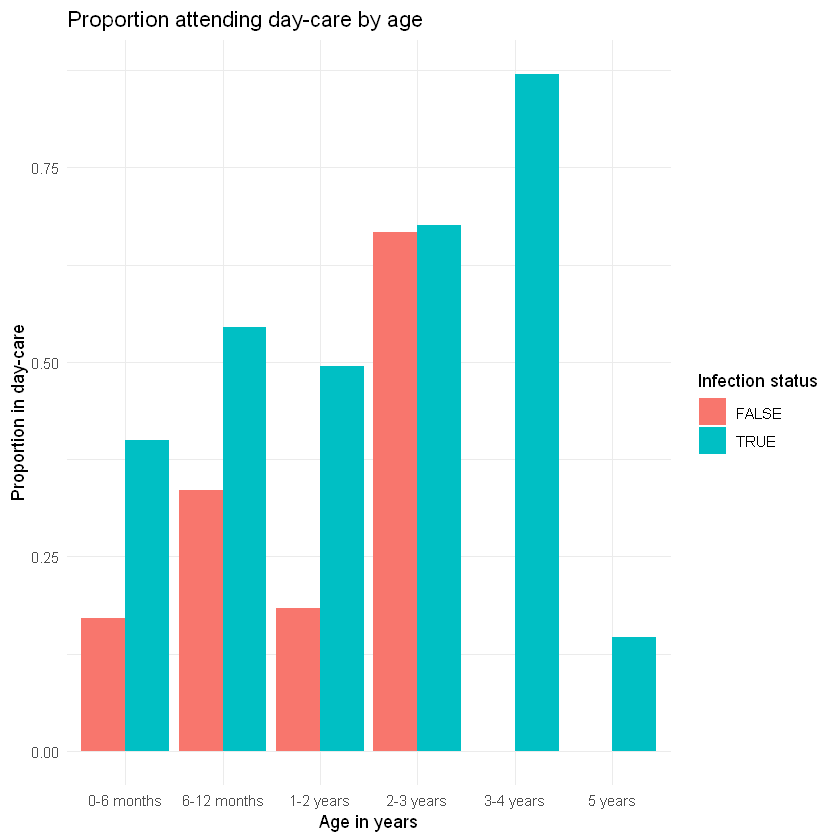

In [122]:
#png("daycare_by_age_and_infections.png")
p<-ggplot(data=dframe, aes(x=values, y=daycare, fill = factor(inf))) +
  geom_bar(position = 'dodge', stat="identity")+
  theme_minimal()+
  labs(title="Proportion attending day-care by age",
        x ="Age in years", y = "Proportion in day-care", fill = "Infection status") 
p
#dev.off()

In [123]:
#Proportion who attended daycare who were seroconverted
daycare <- subset(rsv.data, visitnursery_child == 1)
tab <- table(daycare$age_years, daycare$infection)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), daycare=ptab[,2])
dframe <- dframe[c(1,6,2:5), ]
dframe

,values,daycare
,<chr>,<dbl>
0-6 months,0-6 months,0.0800000
6-12 months,6-12 months,0.4186047
1-2 years,1-2 years,0.8771930
2-3 years,2-3 years,0.9583333
3-4 years,3-4 years,1.0000000
5 years,5 years,1.0000000


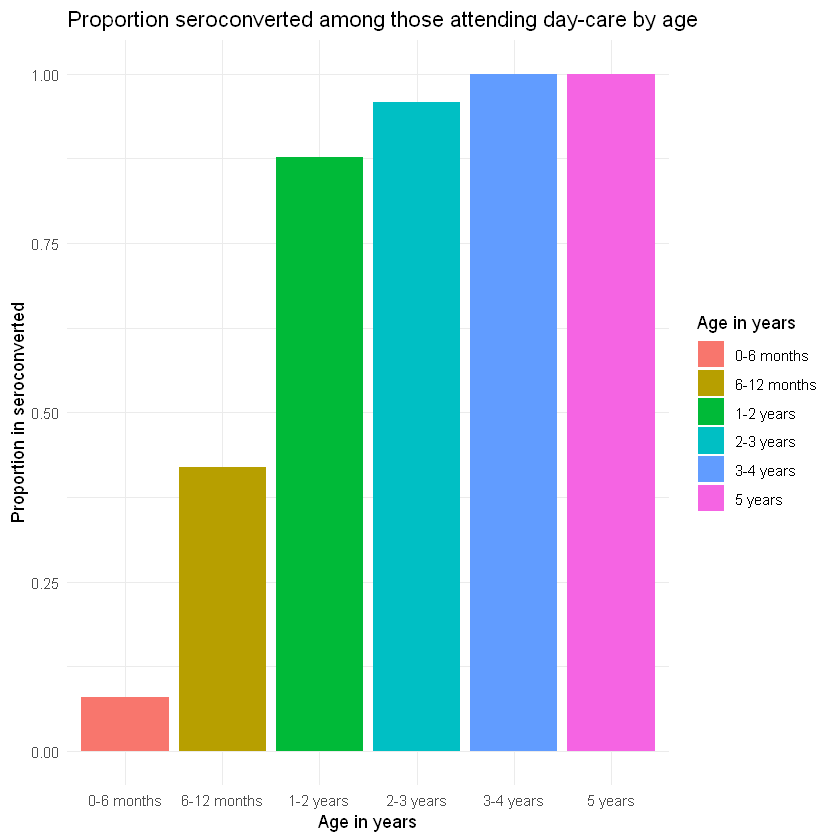

In [127]:
dframe$values <- factor(dframe$values, levels = c('0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '5 years'))
#png("infected_by_daycare_status.png")
p<-ggplot(data=dframe, aes(x=values, y=daycare, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion seroconverted among those attending day-care by age",
        x ="Age in years", y = "Proportion in seroconverted") + scale_fill_discrete(name="Age in years")
p
#dev.off()

In [25]:
#proportion seroconverted among those who attended daycare
daycare_infected <- subset(daycare, infection == 1)
n_infected <- count(daycare_infected)
n_daycare <- count (daycare)
prop_inf_daycare <- n_infected/n_daycare
prop_inf_daycare

n
<dbl>
0.6951673


**Daycare by season of birth**

,values,nursery
,<chr>,<dbl>
Autumn,Autumn,0.42073
Spring,Spring,0.42262
Summer,Summer,0.46369
Winter,Winter,0.30872


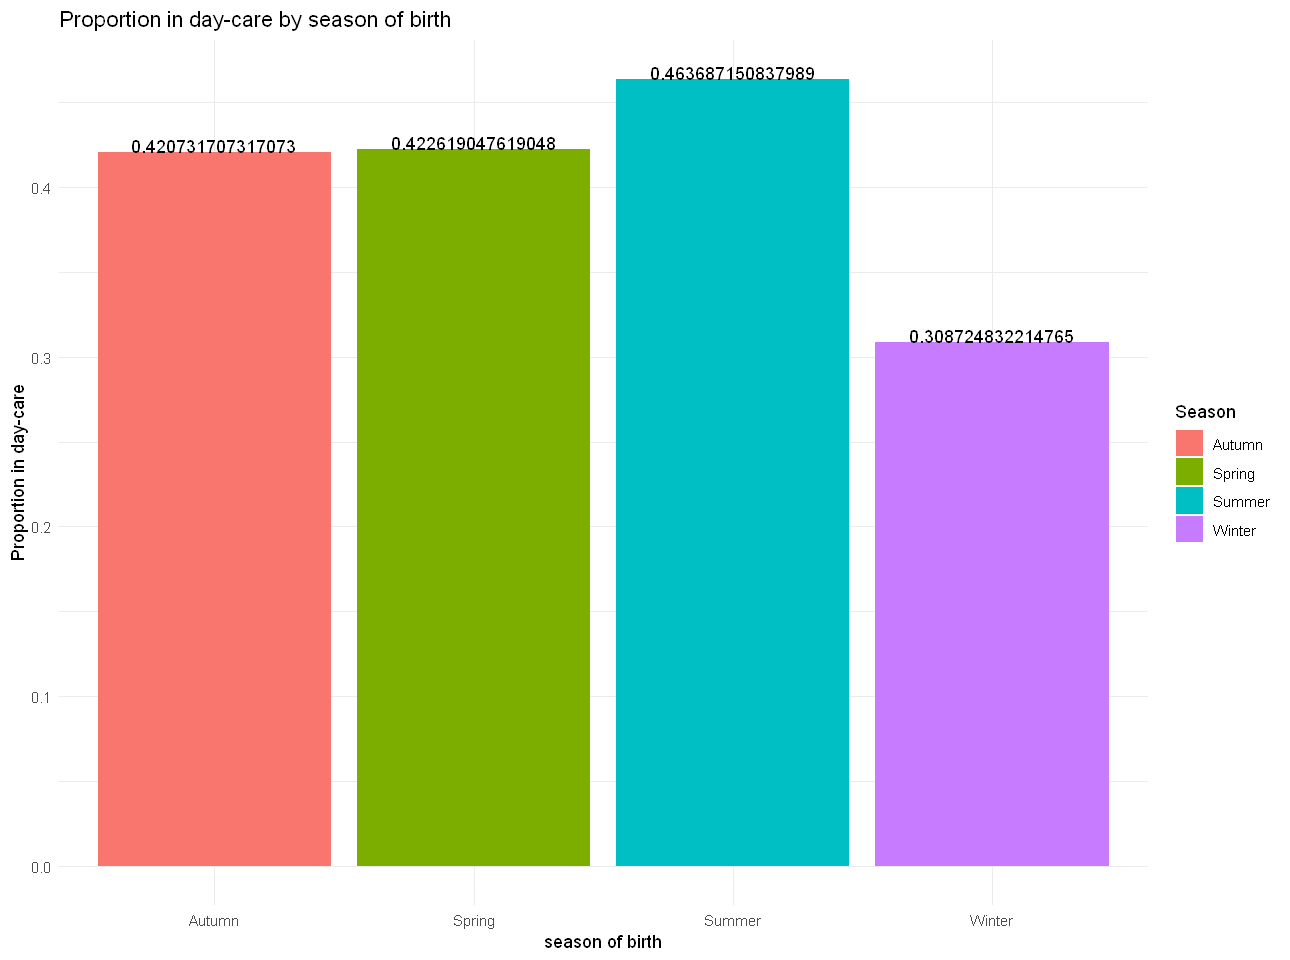

In [83]:
tab <- table(rsv.data$season_birth, rsv.data$visitnursery_child)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), nursery=ptab[,2])
dframe
#png("infection_by_season.png")
p<-ggplot(data=dframe, aes(x=values, y=nursery, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion in day-care by season of birth",
        x ="season of birth", y = "Proportion in day-care") + scale_fill_discrete(name="Season") + geom_text(aes(label = nursery), vjust = 0)
p
#dev.off()

,values,nursery
,<fct>,<dbl>
0-6 months,0-6 months,0.22222
6-12 months,6-12 months,0.40476
12-18 months,12-18 months,0.33333
18-24 months,18-24 months,0.45833
24-30 months,24-30 months,1.00000
30-36 months,30-36 months,0.88889
36-42 months,36-42 months,0.87500
42-48 months,42-48 months,0.75000
48-54 months,48-54 months,0.11111


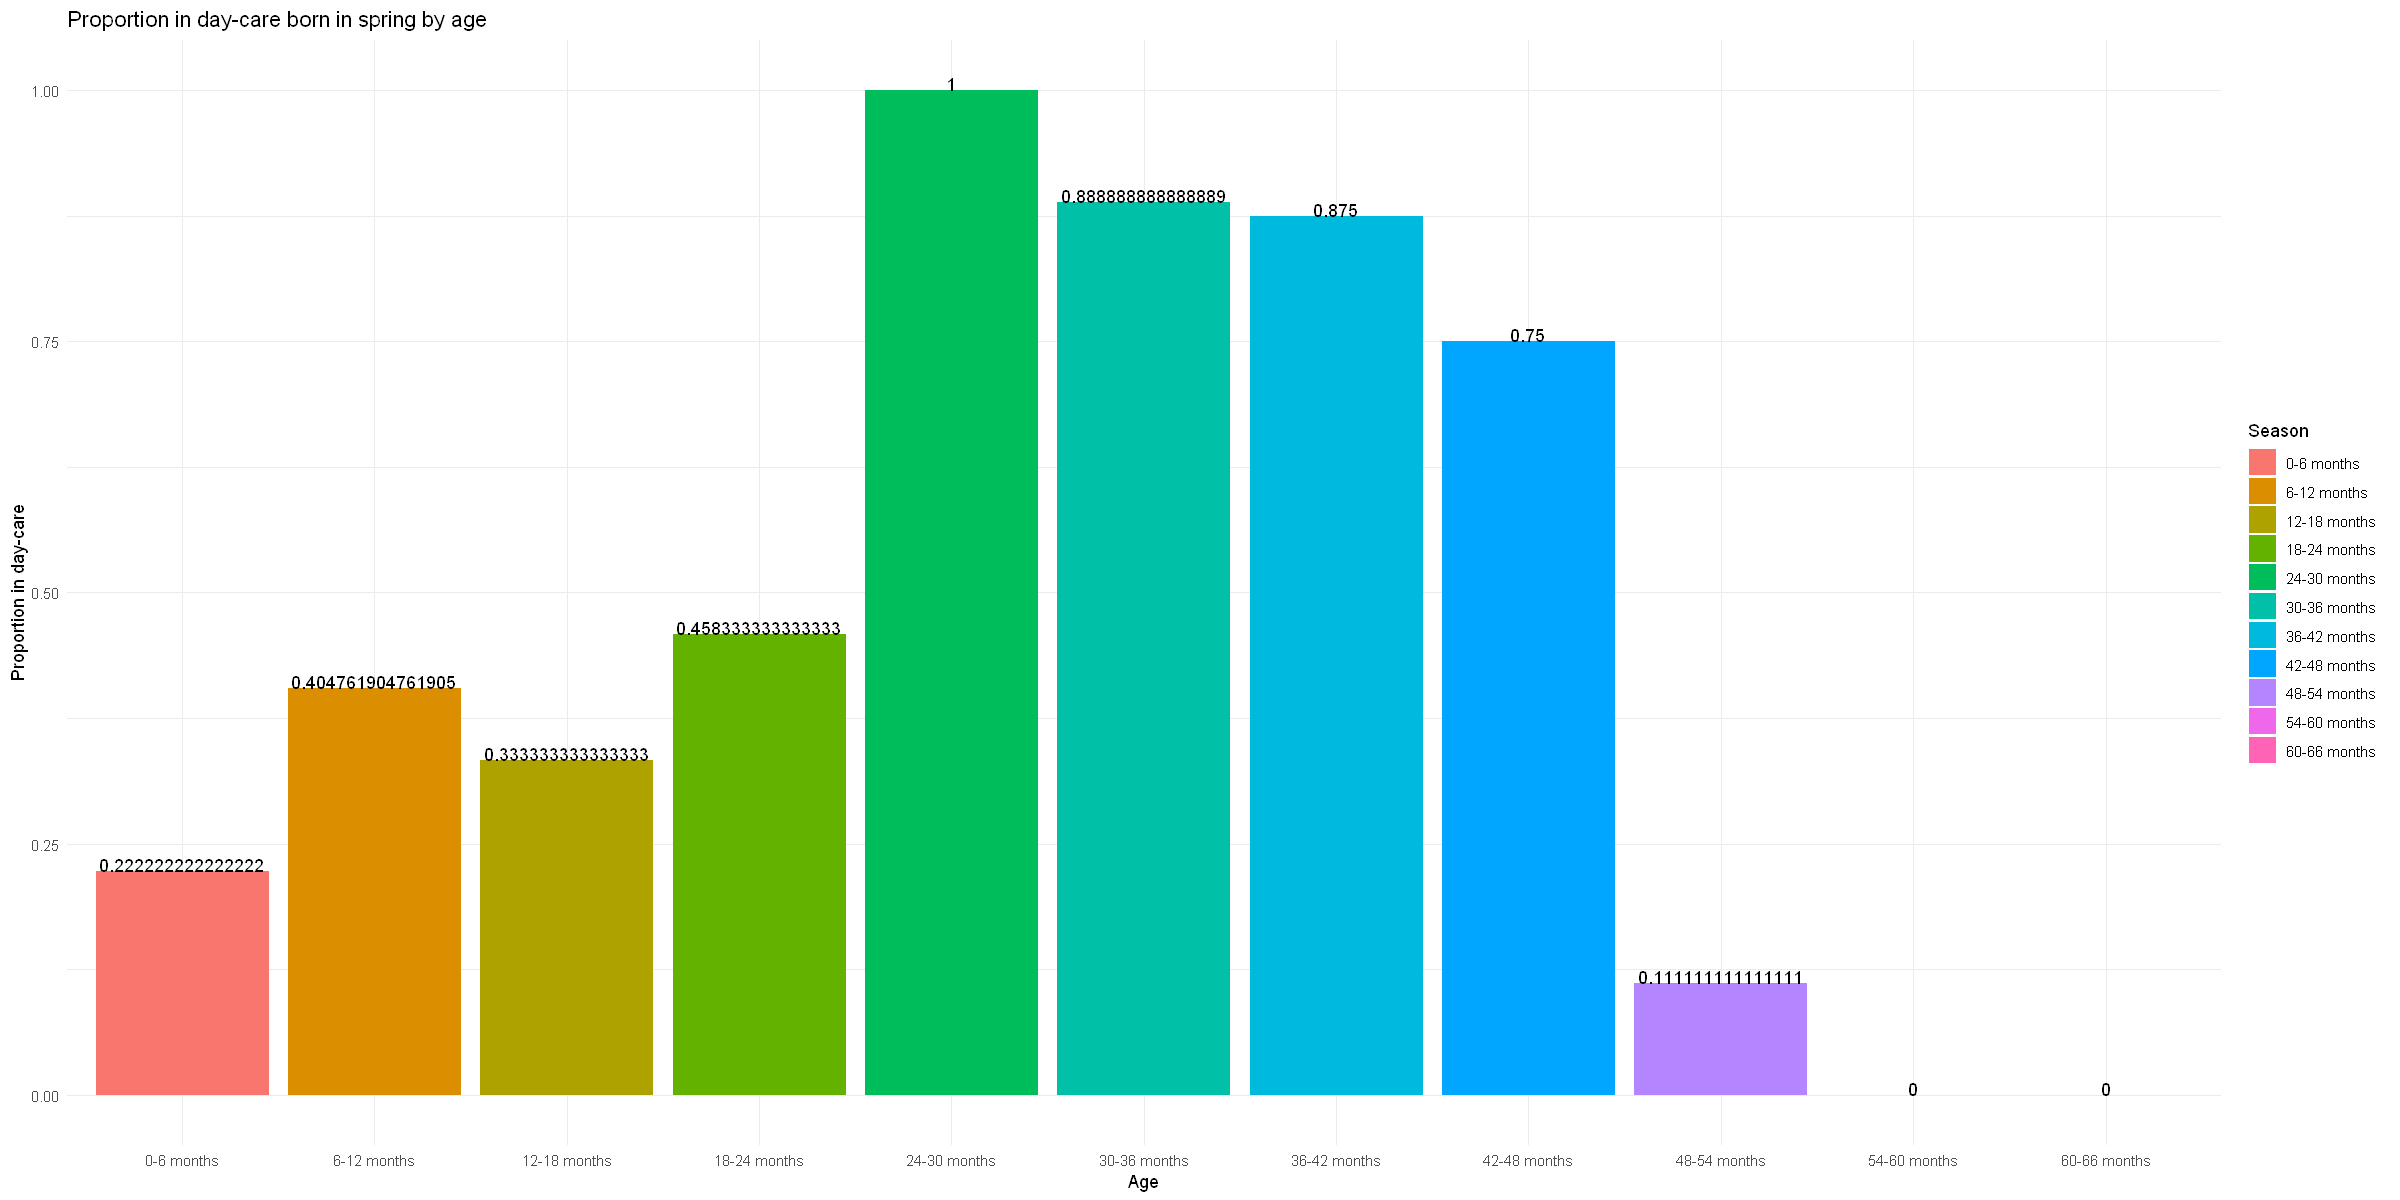

In [125]:
spring.df <- subset(rsv.data, season_birth == 'Spring')
tab <- table(spring.df$age_years, spring.df$visitnursery_child)
ptab <- prop.table(tab, margin=1)
dframe1 <- data.frame(values=rownames(tab), nursery=ptab[,2])
dframe1$values <- factor(dframe1$values, levels = c('0-6 months', '6-12 months', '12-18 months', '18-24 months', 
                                                    '24-30 months', '30-36 months', '36-42 months','42-48 months',
                                                   '48-54 months', '54-60 months', '60-66 months'))
dframe1 <- dframe1[c(1,10,2:9, 11),]
dframe1
options(repr.plot.width = 20, repr.plot.height = 10)
#png("infection_by_season.png")
p<-ggplot(data=dframe1, aes(x=values, y=nursery, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion in day-care born in spring by age",
        x ="Age", y = "Proportion in day-care") + scale_fill_discrete(name="Season") + geom_text(aes(label = nursery), vjust = 0)
p

,values,nursery
,<fct>,<dbl>
0-6 months,0-6 months,0.045455
6-12 months,6-12 months,0.408451
12-18 months,12-18 months,0.500000
18-24 months,18-24 months,0.526316
24-30 months,24-30 months,0.642857
30-36 months,30-36 months,0.785714
36-42 months,36-42 months,0.750000
42-48 months,42-48 months,1.000000
48-54 months,48-54 months,0.333333


Warning message:
"Removed 1 rows containing missing values (position_stack)."
Warning message:
"Removed 1 rows containing missing values (geom_text)."


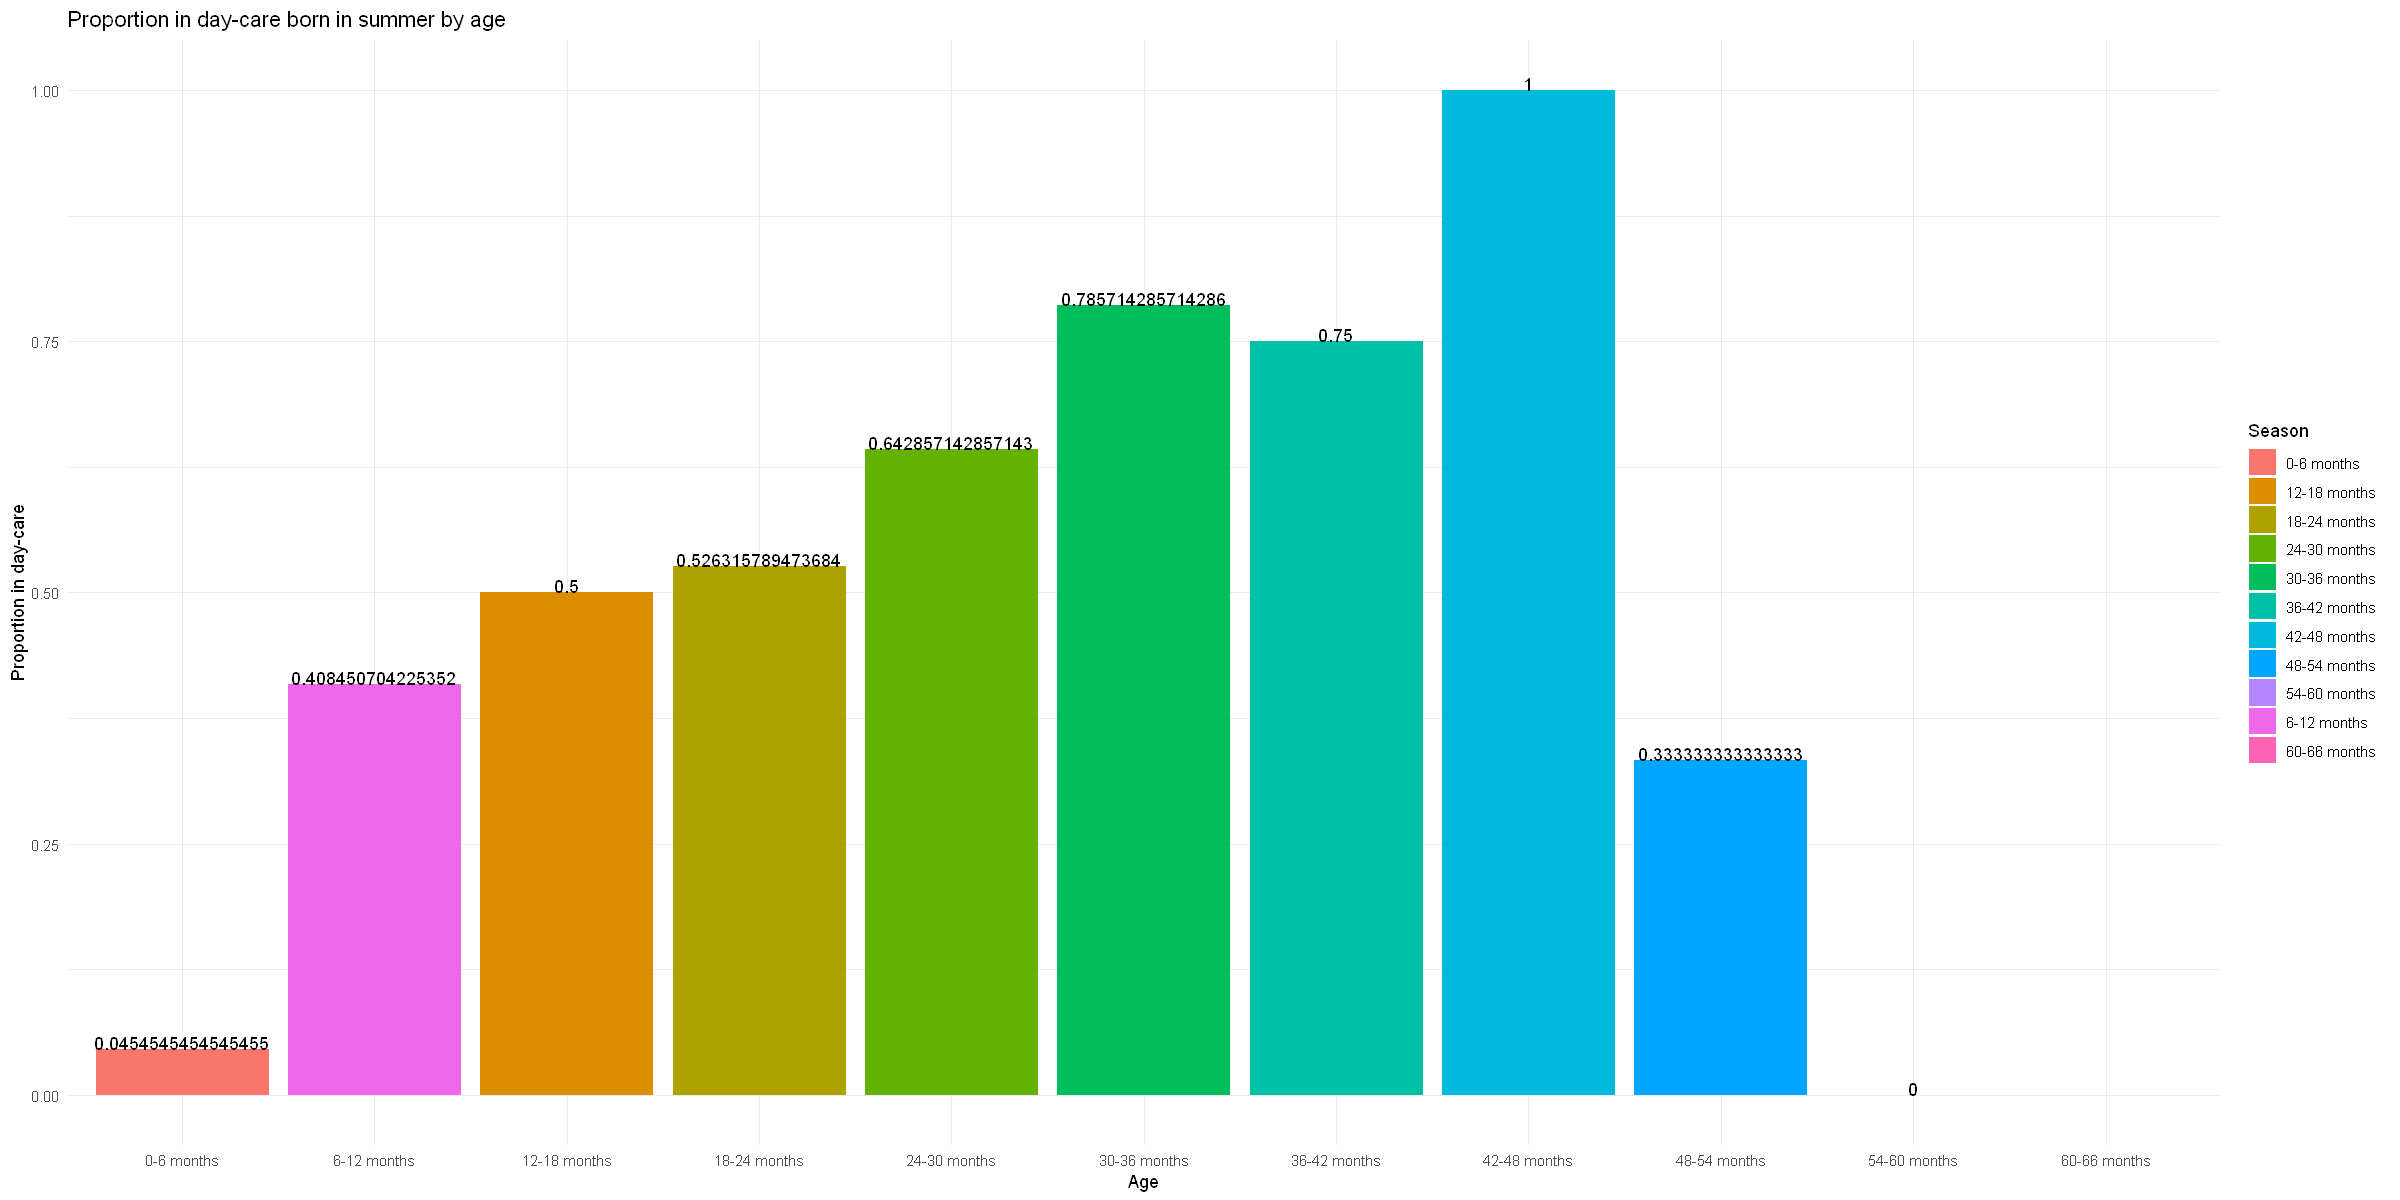

In [126]:
summer.df <- subset(rsv.data, season_birth == 'Summer')
tab <- table(summer.df$age_years, summer.df$visitnursery_child)
ptab <- prop.table(tab, margin=1)
dframe2 <- data.frame(values=rownames(tab), nursery=ptab[,2])
dframe2$values <- factor(dframe2$values, levels = c('0-6 months', '6-12 months', '12-18 months', '18-24 months', 
                                                    '24-30 months', '30-36 months', '36-42 months','42-48 months',
                                                   '48-54 months', '54-60 months', '60-66 months'))
dframe2 <- dframe2[c(1,10,2:9, 11),]
dframe2
options(repr.plot.width = 20, repr.plot.height = 10)
#png("infection_by_season.png")
p<-ggplot(data=dframe2, aes(x=values, y=nursery, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion in day-care born in summer by age",
        x ="Age", y = "Proportion in day-care") + scale_fill_discrete(name="Season") + geom_text(aes(label = nursery), vjust = 0)
p

,values,nursery
,<fct>,<dbl>
0-6 months,0-6 months,0.26087
6-12 months,6-12 months,0.42857
12-18 months,12-18 months,0.33333
18-24 months,18-24 months,0.38095
24-30 months,24-30 months,0.37500
30-36 months,30-36 months,0.55556
36-42 months,36-42 months,0.80000
42-48 months,42-48 months,0.90000
48-54 months,48-54 months,0.00000


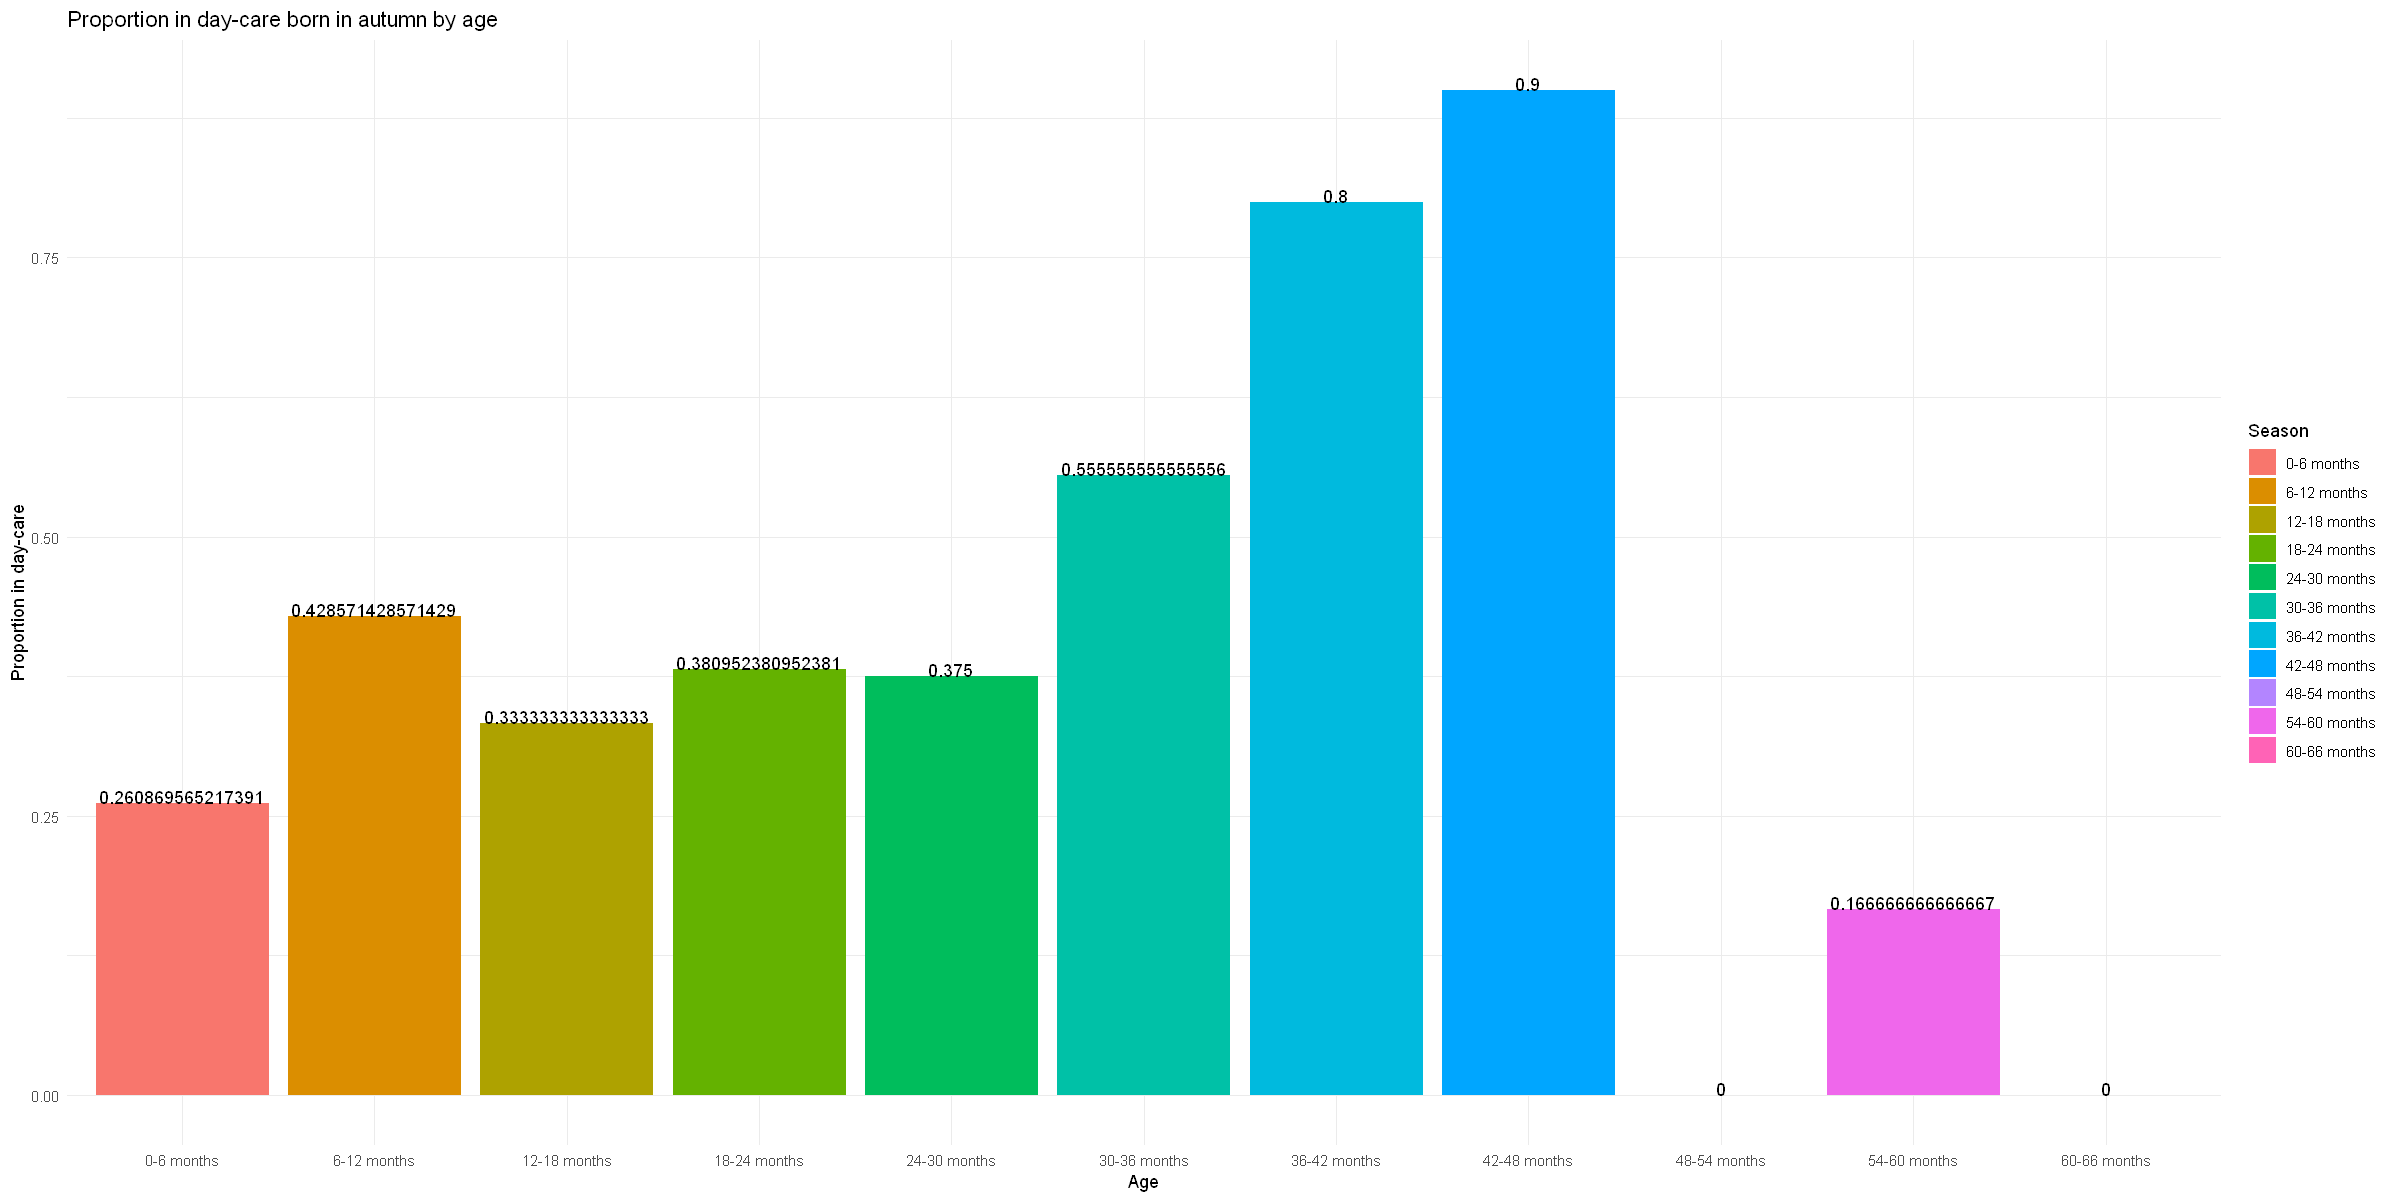

In [143]:
autumn.df <- subset(rsv.data, season_birth == 'Autumn')
tab <- table(autumn.df$age_years, autumn.df$visitnursery_child)
ptab <- prop.table(tab, margin=1)
dframe3 <- data.frame(values=rownames(tab), nursery=ptab[,2])
dframe3$values <- factor(dframe3$values, levels = c('0-6 months', '6-12 months', '12-18 months', '18-24 months', 
                                                    '24-30 months', '30-36 months', '36-42 months','42-48 months',
                                                   '48-54 months', '54-60 months', '60-66 months'))
dframe3 <- dframe3[c(1,10,2:9,11),]
dframe3
options(repr.plot.width = 20, repr.plot.height = 10)
#png("infection_by_season.png")
p<-ggplot(data=dframe3, aes(x=values, y=nursery, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion in day-care born in autumn by age",
        x ="Age", y = "Proportion in day-care") + scale_fill_discrete(name="Season") + geom_text(aes(label = nursery), vjust = 0)
p

,values,nursery
,<fct>,<dbl>
0-6 months,0-6 months,0.16949
6-12 months,6-12 months,0.32258
12-18 months,12-18 months,0.30769
18-24 months,18-24 months,0.35294
24-30 months,24-30 months,0.33333
30-36 months,30-36 months,0.50000
36-42 months,36-42 months,0.66667
42-48 months,42-48 months,1.00000
48-54 months,48-54 months,0.50000


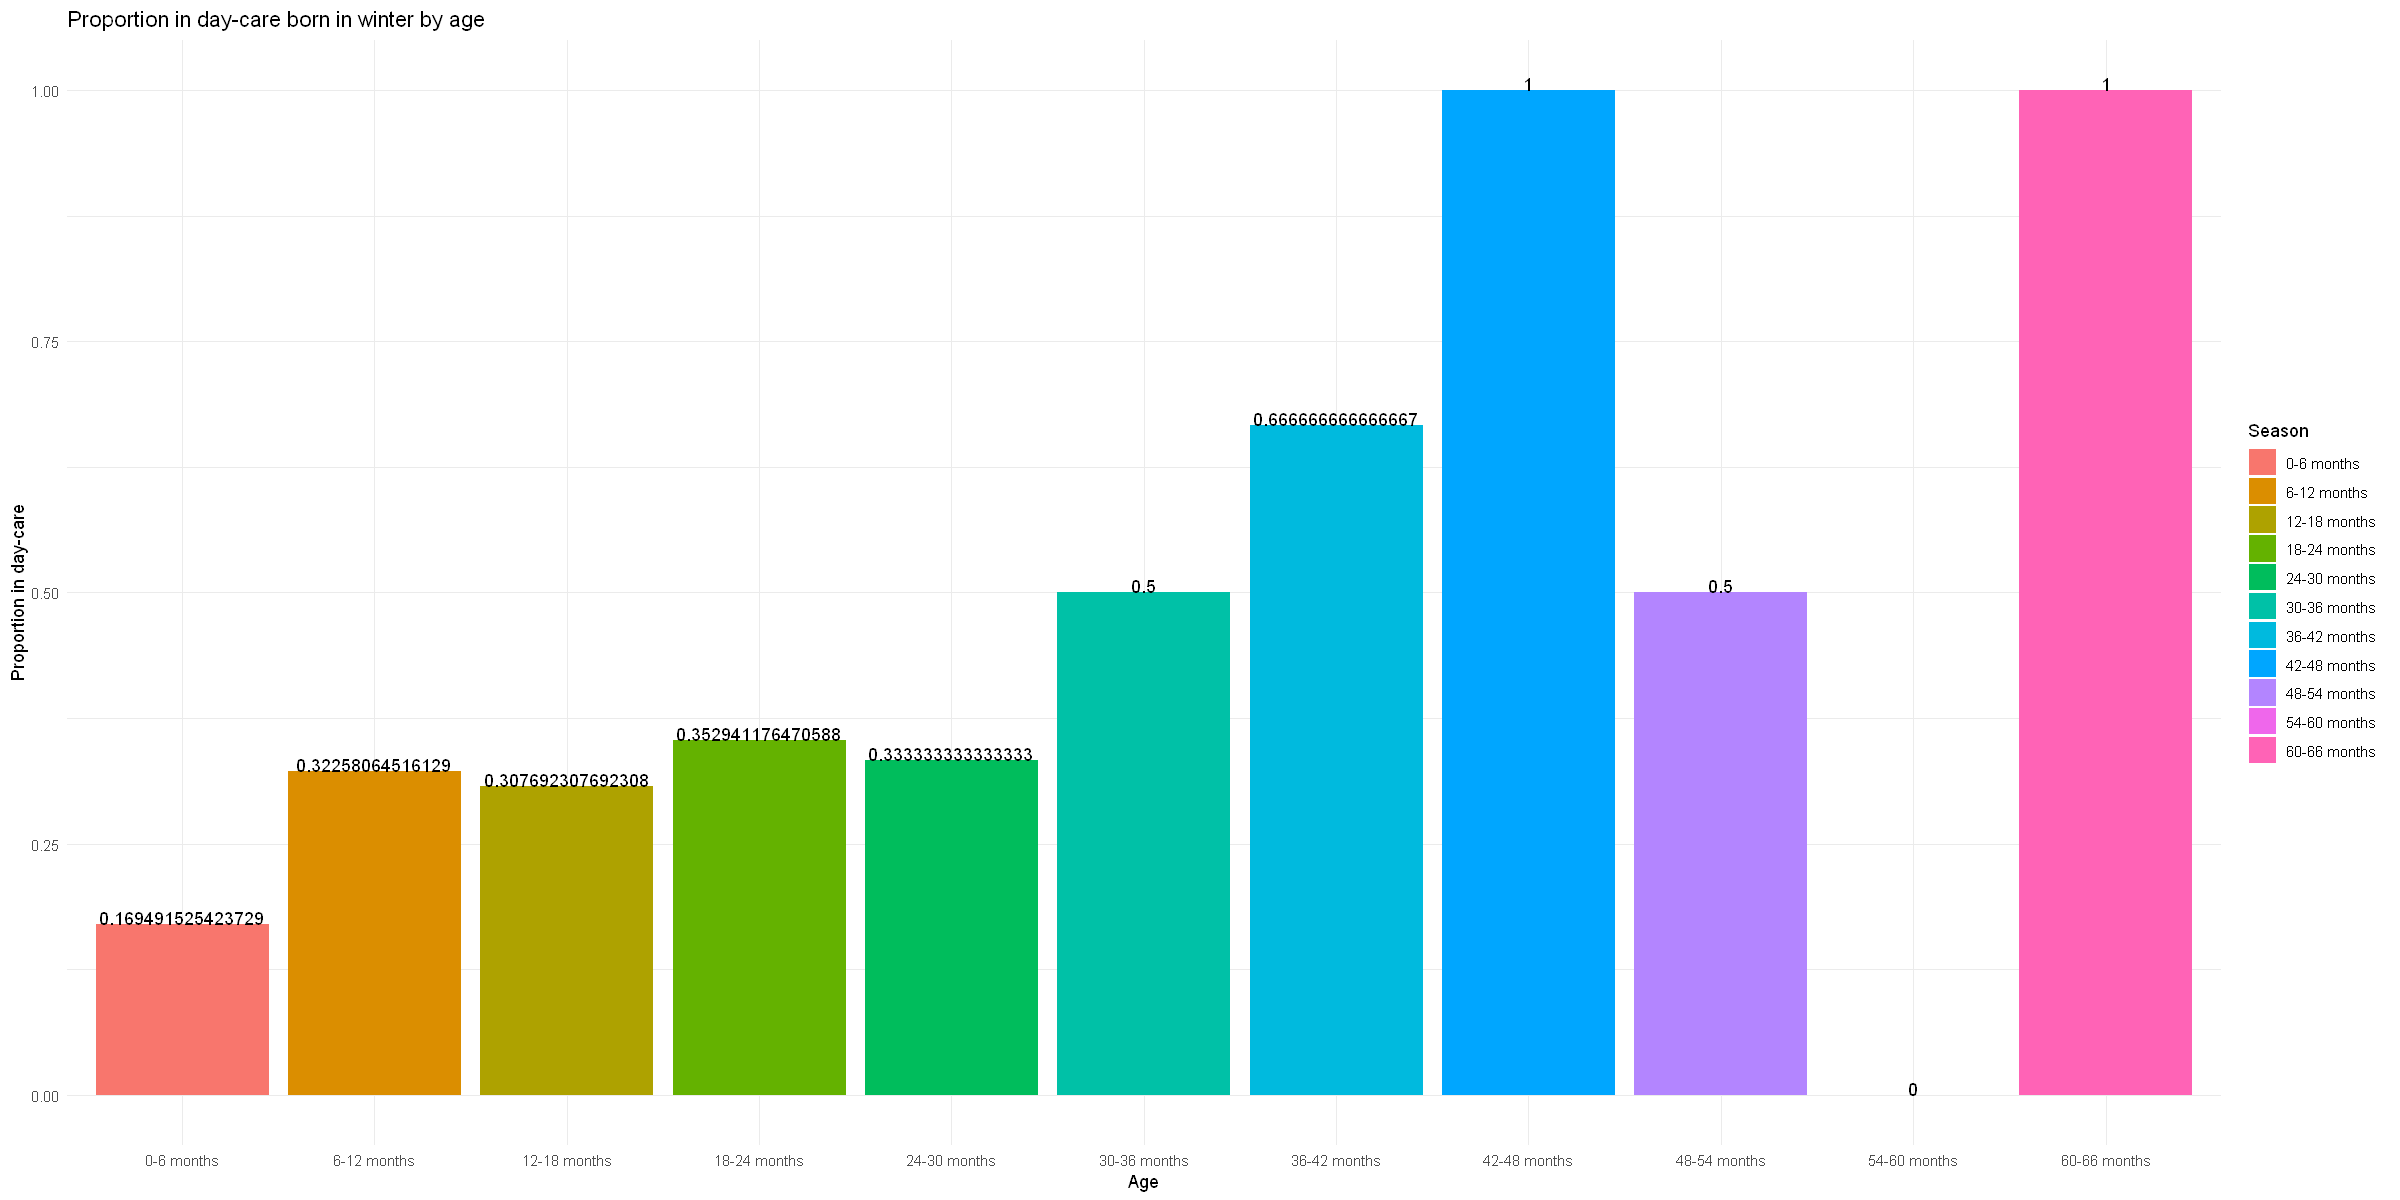

In [142]:
winter.df <- subset(rsv.data, season_birth == 'Winter')
tab <- table(winter.df$age_years, winter.df$visitnursery_child)
ptab <- prop.table(tab, margin=1)
dframe4 <- data.frame(values=rownames(tab), nursery=ptab[,2])
dframe4$values <- factor(dframe4$values, levels = c('0-6 months', '6-12 months', '12-18 months', '18-24 months', 
                                                    '24-30 months', '30-36 months', '36-42 months','42-48 months',
                                                   '48-54 months', '54-60 months', '60-66 months'))
dframe4 <- dframe4[c(1,10,2:9, 11),]
dframe4
options(repr.plot.width = 20, repr.plot.height = 10)
#png("infection_by_season.png")
p<-ggplot(data=dframe4, aes(x=values, y=nursery, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion in day-care born in winter by age",
        x ="Age", y = "Proportion in day-care") + scale_fill_discrete(name="Season") + geom_text(aes(label = nursery), vjust = 0)
p

In [135]:
season <- c('Spring','Spring','Spring','Spring','Spring', 'Spring', 'Spring', 'Spring', 'Spring', 'Spring', 'Spring')
dframe1 <-cbind(dframe1, season)
dframe1

,values,nursery,season
,<fct>,<dbl>,<chr>
0-6 months,0-6 months,0.22222,Spring
6-12 months,6-12 months,0.40476,Spring
12-18 months,12-18 months,0.33333,Spring
18-24 months,18-24 months,0.45833,Spring
24-30 months,24-30 months,1.00000,Spring
30-36 months,30-36 months,0.88889,Spring
36-42 months,36-42 months,0.87500,Spring
42-48 months,42-48 months,0.75000,Spring
48-54 months,48-54 months,0.11111,Spring


In [137]:
season <- c('Summer','Summer','Summer','Summer','Summer', 'Summer', 'Summer', 'Summer', 'Summer', 'Summer', 'Summer')
dframe2 <-cbind(dframe2, season)
dframe2

,values,nursery,season
,<fct>,<dbl>,<chr>
0-6 months,0-6 months,0.045455,Summer
6-12 months,6-12 months,0.408451,Summer
12-18 months,12-18 months,0.500000,Summer
18-24 months,18-24 months,0.526316,Summer
24-30 months,24-30 months,0.642857,Summer
30-36 months,30-36 months,0.785714,Summer
36-42 months,36-42 months,0.750000,Summer
42-48 months,42-48 months,1.000000,Summer
48-54 months,48-54 months,0.333333,Summer


In [144]:
season <- c('Autumn','Autumn','Autumn','Autumn','Autumn', 'Autumn', 'Autumn', 'Autumn', 'Autumn', 'Autumn', 'Autumn')
dframe3 <-cbind(dframe3, season)
dframe3

,values,nursery,season
,<fct>,<dbl>,<chr>
0-6 months,0-6 months,0.26087,Autumn
6-12 months,6-12 months,0.42857,Autumn
12-18 months,12-18 months,0.33333,Autumn
18-24 months,18-24 months,0.38095,Autumn
24-30 months,24-30 months,0.37500,Autumn
30-36 months,30-36 months,0.55556,Autumn
36-42 months,36-42 months,0.80000,Autumn
42-48 months,42-48 months,0.90000,Autumn
48-54 months,48-54 months,0.00000,Autumn


In [145]:
season <- c('Winter','Winter','Winter','Winter','Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter', 'Winter')
dframe4 <-cbind(dframe4, season)
dframe4

,values,nursery,season
,<fct>,<dbl>,<chr>
0-6 months,0-6 months,0.16949,Winter
6-12 months,6-12 months,0.32258,Winter
12-18 months,12-18 months,0.30769,Winter
18-24 months,18-24 months,0.35294,Winter
24-30 months,24-30 months,0.33333,Winter
30-36 months,30-36 months,0.50000,Winter
36-42 months,36-42 months,0.66667,Winter
42-48 months,42-48 months,1.00000,Winter
48-54 months,48-54 months,0.50000,Winter


In [146]:
dframe <-rbind(dframe1, dframe2, dframe3, dframe4)
dframe

,values,nursery,season
,<fct>,<dbl>,<chr>
0-6 months,0-6 months,0.222222,Spring
6-12 months,6-12 months,0.404762,Spring
12-18 months,12-18 months,0.333333,Spring
18-24 months,18-24 months,0.458333,Spring
24-30 months,24-30 months,1.000000,Spring
30-36 months,30-36 months,0.888889,Spring
36-42 months,36-42 months,0.875000,Spring
42-48 months,42-48 months,0.750000,Spring
48-54 months,48-54 months,0.111111,Spring


Warning message:
"Removed 1 rows containing missing values (geom_bar)."


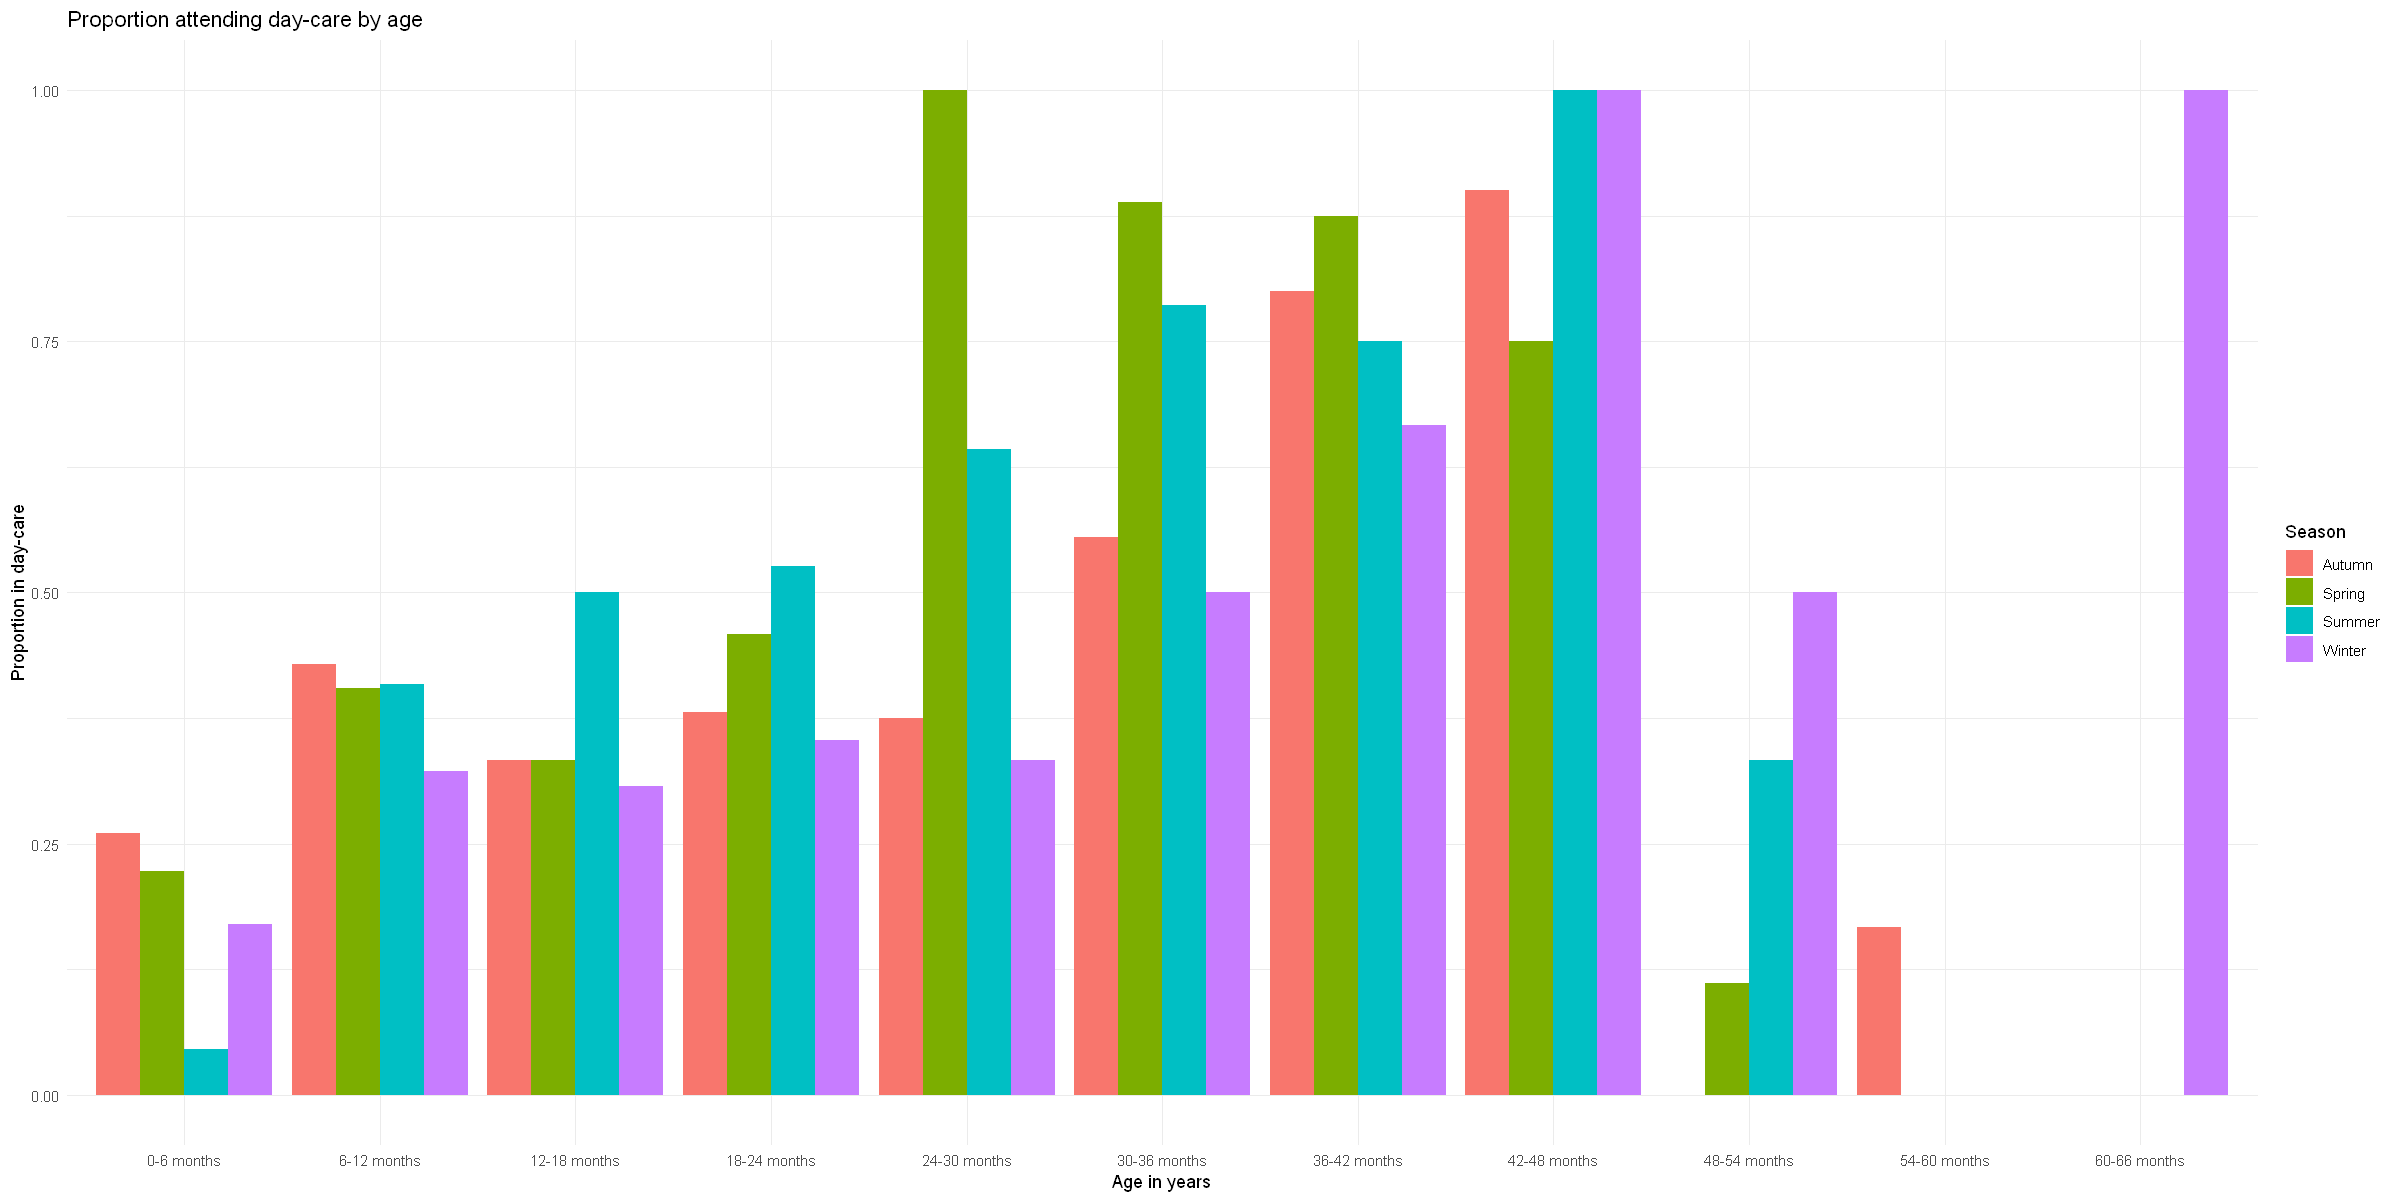

In [147]:
#png("daycare_by_age_and_infections.png")
p<-ggplot(data=dframe, aes(x=values, y=nursery, fill = factor(season))) +
  geom_bar(position = 'dodge', stat="identity")+
  theme_minimal()+
  labs(title="Proportion attending day-care by age",
        x ="Age in years", y = "Proportion in day-care", fill = "Season") 
p
#dev.off()

**Correlation between daycare and contacts**

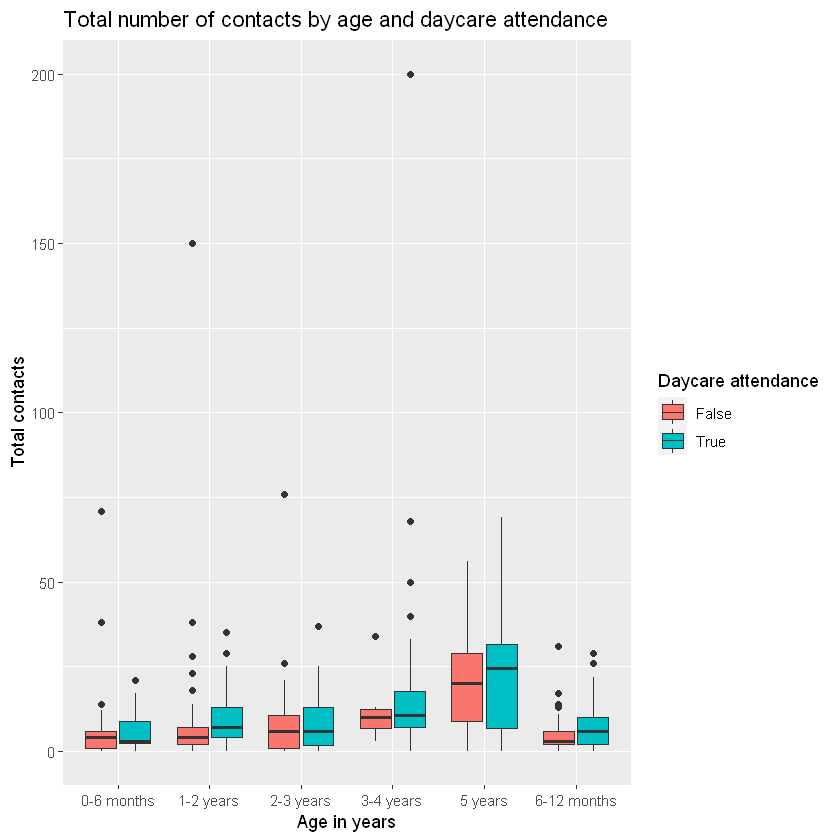

In [128]:
#png("boxplot_contacts_by_age_and_daycare.png")
rsv.data %>% filter(complete.cases(contacttotal)) %>% 
filter(complete.cases(Nursery))%>%
group_by(age_years) %>% 
ggplot(aes(x=age_years,y=contacttotal,fill=factor(Nursery)))+geom_boxplot()+
labs(title="Total number of contacts by age and daycare attendance",
        x ="Age in years", y = "Total contacts", fill = "Daycare attendance") 
#dev.off()

In [129]:
#contacts among infected children who went to day-care
summ_contact <- rsv.data %>% 
filter(infection == 1)%>%
filter(complete.cases(visitnursery_child))%>%
filter(visitnursery_child == 1.0) %>% 
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,1.500000,1.5,2.121320,0,3
1-2 years,10.191489,10.0,8.115038,0,35
2-3 years,8.717391,6.0,8.544428,0,37
3-4 years,17.934783,10.5,30.269458,0,200
5 years,25.500000,24.5,25.209125,0,69
6-12 months,7.882353,6.0,7.602889,0,29


In [130]:
#contacts among infected children who didn't go to day-care
summ_contact <- rsv.data %>% 
filter(infection == 1)%>%
filter(complete.cases(visitnursery_child))%>%
filter(visitnursery_child == 0.0) %>% 
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,4.000000,4.0,NA,4,4
1-2 years,8.319149,3.0,22.20371,0,150
2-3 years,9.954545,5.5,16.31966,0,76
3-4 years,12.666667,10.0,11.03932,3,34
5 years,21.212121,20.0,16.04828,0,56
6-12 months,4.409091,4.0,3.15714,0,14


In [131]:
#contacts among uninfected children who went to day-care
summ_contact <- rsv.data %>% 
filter(infection == 0)%>%
filter(complete.cases(visitnursery_child))%>%
filter(visitnursery_child == 1.0) %>% 
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,6.812500,4,6.625393,0,21
1-2 years,2.857143,2,3.184785,0,7
2-3 years,5.000000,5,4.242641,2,8
6-12 months,6.088889,6,4.378783,0,14


In [132]:
#contacts among uninfected children who didn't go to day-care
summ_contact <- rsv.data %>% 
filter(infection == 0)%>%
filter(complete.cases(visitnursery_child))%>%
filter(visitnursery_child == 0.0) %>% 
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-6 months,5.152778,4,9.371307,0,71
1-2 years,6.000000,5,4.959839,0,23
2-3 years,6.000000,6,NA,6,6
6-12 months,4.243902,3,4.525813,0,31


**Siblings**

In [48]:
infected <- subset(rsv.data, infection == 1)
tab <- table(infected$age_years, infected$Siblings04)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), siblings04=ptab[,2])
dframe <- dframe[c(1,6,2:5), ]
inf <- c(TRUE, TRUE, TRUE, TRUE, TRUE, TRUE)
dframe <-cbind(dframe, inf)
dframe

,values,siblings04,inf
,<chr>,<dbl>,<lgl>
0-6 months,0-6 months,1.0000000,TRUE
6-12 months,6-12 months,0.4615385,TRUE
1-2 years,1-2 years,0.4680851,TRUE
2-3 years,2-3 years,0.3442623,TRUE
3-4 years,3-4 years,0.2156863,TRUE
5 years,5 years,0.4324324,TRUE


In [49]:
uninfected <- subset(rsv.data, infection == 0)
tab <- table(uninfected$age_years, uninfected$Siblings04)
ptab <- prop.table(tab, margin=1)
dframe1 <- data.frame(values=rownames(tab), siblings04=ptab[,2])
dframe1 <- dframe1[c(1,6,2:5), ]
#dframe1$values <- factor(dframe1$values, levels = c('0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '5 years'))
inf <- c(FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)
dframe1 <-cbind(dframe1, inf)
dframe1

,values,siblings04,inf
,<chr>,<dbl>,<lgl>
0-6 months,0-6 months,0.4656489,FALSE
6-12 months,6-12 months,0.3768116,FALSE
1-2 years,1-2 years,0.4054054,FALSE
2-3 years,2-3 years,0.0000000,FALSE
3-4 years,3-4 years,NaN,FALSE
5 years,5 years,NaN,FALSE


In [50]:
for (d in seq_along(dframe1$values)){
    if (dframe1$siblings04[d] == 'NaN'){
        dframe1$siblings04[d] <- 0
        }
    }

In [51]:
dframe <-rbind(dframe, dframe1)
dframe

,values,siblings04,inf
,<chr>,<dbl>,<lgl>
0-6 months,0-6 months,1.0000000,TRUE
6-12 months,6-12 months,0.4615385,TRUE
1-2 years,1-2 years,0.4680851,TRUE
2-3 years,2-3 years,0.3442623,TRUE
3-4 years,3-4 years,0.2156863,TRUE
5 years,5 years,0.4324324,TRUE
0-6 months1,0-6 months,0.4656489,FALSE
6-12 months1,6-12 months,0.3768116,FALSE
1-2 years1,1-2 years,0.4054054,FALSE


In [52]:
dframe$values <- factor(dframe$values, levels = c('0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '5 years',
                                                 '0-6 months1', '6-12 months1', '1-2 years1', '2-3 years1', '3-4 years1', '5 years1'))

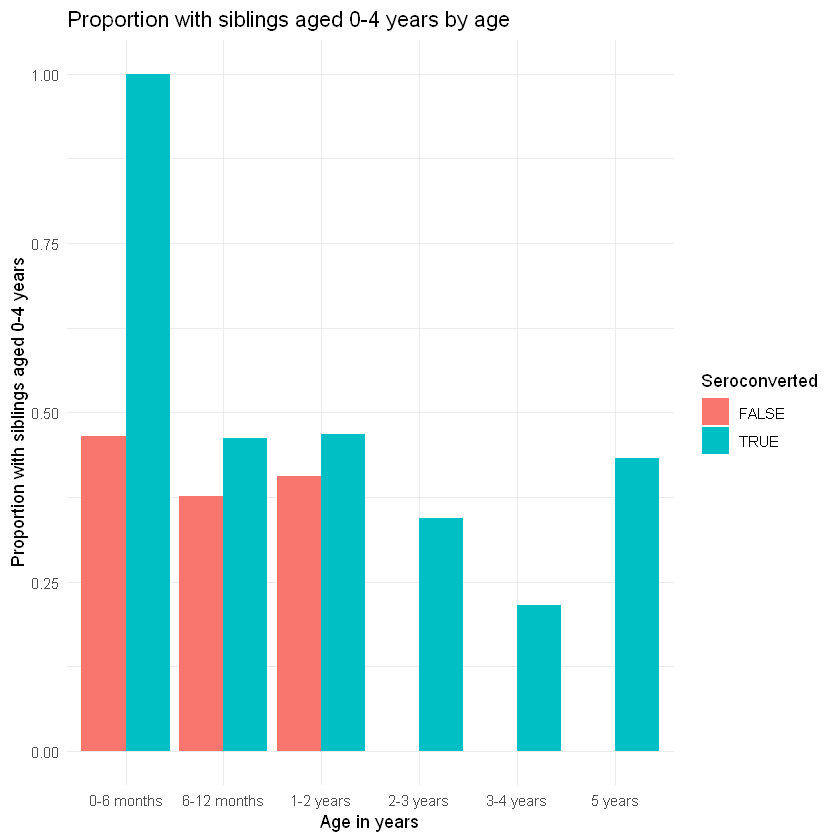

In [53]:
#png("siblings04_by_age.png")
p<-ggplot(data=dframe, aes(x=values, y=siblings04, fill = factor(inf))) +
  geom_bar(position = 'dodge', stat="identity")+
  theme_minimal()+
  labs(title="Proportion with siblings aged 0-4 years by age",
        x ="Age in years", y = "Proportion with siblings aged 0-4 years", fill = "Seroconverted") 
p
#dev.off()

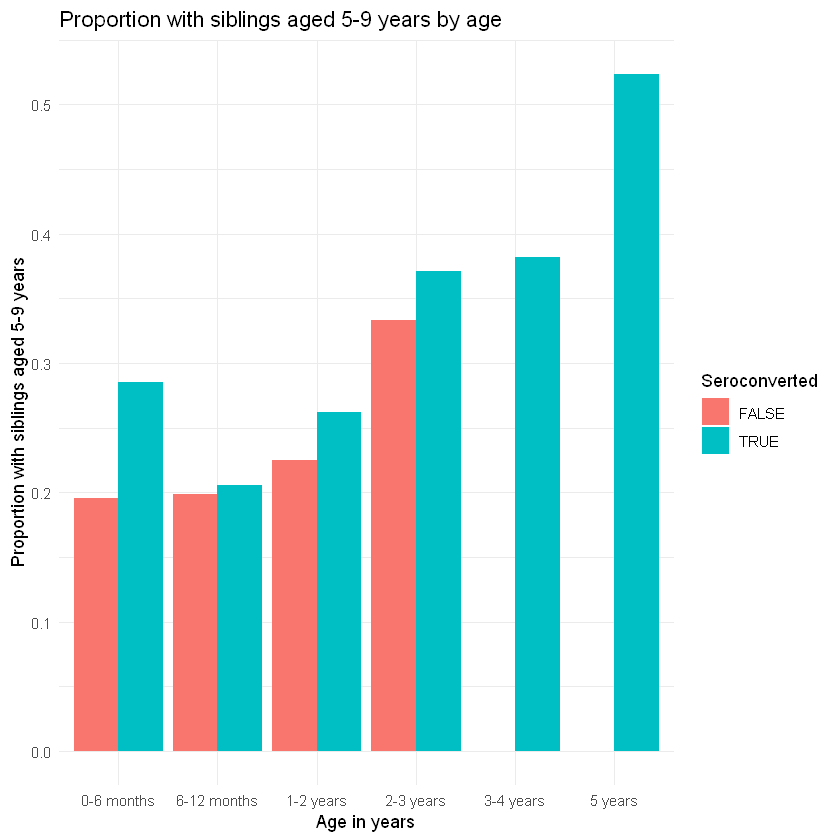

In [47]:
infected <- subset(rsv.data, infection == 1)
tab <- table(infected$age_years, infected$Siblings59)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), siblings59=ptab[,2])
dframe <- dframe[c(1,6,2:5), ]
#dframe$values <- factor(dframe$values, levels = c('0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '5 years'))
inf <- c(TRUE,TRUE,TRUE,TRUE,TRUE, TRUE)
dframe <-cbind(dframe, inf)

uninfected <- subset(rsv.data, infection == 0)
tab <- table(uninfected$age_years, uninfected$Siblings59)
ptab <- prop.table(tab, margin=1)
dframe1 <- data.frame(values=rownames(tab), siblings59=ptab[,2])
dframe1 <- dframe1[c(1,6,2:5), ]
inf <- c(FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)
dframe1 <-cbind(dframe1, inf)

for (d in seq_along(dframe1$values)){
    if (dframe1$siblings59[d] == 'NaN'){
        dframe1$siblings59[d] <- 0
        }
    }

dframe <- rbind(dframe, dframe1)
dframe$values <- factor(dframe$values, levels = c('0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '5 years',
                                                 '0-6 months1', '6-12 months1', '1-2 years1', '2-3 years1', '3-4 years1', '5 years1'))

#png("siblings59_by_age.png")
p<-ggplot(data=dframe, aes(x=values, y=siblings59, fill = factor(inf))) +
  geom_bar(position = 'dodge', stat="identity")+
  theme_minimal()+
  labs(title="Proportion with siblings aged 5-9 years by age",
        x ="Age in years", y = "Proportion with siblings aged 5-9 years", fill = "Seroconverted") 
p
#dev.off()

## 2006-2007 cohort ##

In [12]:
cohort_1 <- subset(rsv.data, cohort == '2006/2007')
head(cohort_1)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,age_years,seasons,cohort,season_birth,nursery_house,pre_term,total_cont,total_cont04,total_cont59,age_at_consul
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>
676,2004-04-01,2006-02-06,1,0.3565,0.60,9.3264,0.08,0.260000,0.01,⋯,1-2 years,2005/2006,2006/2007,Spring,False,NA,3-5,1-2,0,676
600,2004-07-23,2006-03-15,1,772.3431,33.15,473.5323,14.52,3.130699,0.02,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,21-50,11-20,0,600
588,2004-08-09,2006-03-20,0,0.1800,0.03,0.2100,0.19,0.580000,0.03,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,3-5,1-2,0,588
591,2004-08-06,2006-03-20,1,740.2907,70.38,466.2055,49.78,1.886910,0.05,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,1-2,0,0,591
1184,2002-12-29,2006-03-27,1,1999.2353,NA,1459.5921,NA,55.896003,NA,⋯,3-4 years,2005/2006,2006/2007,Winter,False,NA,6-10,1-2,3-5,1184
686,2004-05-12,2006-03-29,1,807.2200,NA,838.7400,NA,15.000000,NA,⋯,1-2 years,2005/2006,2006/2007,Spring,False,NA,1-2,0,0,686


In [35]:
cohort_1 %$% table(age_years, useNA = "ifany")

age_years
 0-1 year 1-2 years 2-3 years 3-4 years   5 years 
      219        79        20        18        21 

In [36]:
cohort_1 %$% table(season_birth, useNA = "ifany")

season_birth
Autumn Spring Summer Winter 
    87     91     96     83 

In [37]:
cohort_1 %$% table(Siblings04, useNA = "ifany")

Siblings04
False  True  <NA> 
  169   169    19 

In [38]:
cohort_1 %$% table(Siblings59, useNA = "ifany")

Siblings59
False  True 
  262    95 

In [39]:
cohort_1 %$% table(Nursery, useNA = "ifany")

Nursery
False  True  <NA> 
  235   120     2 

In [40]:
cohort_1 %$% table(nursery_house, useNA = "ifany")

nursery_house
False  True  <NA> 
  236   117     4 

In [41]:
cohort_1 %$% table(pre_term, useNA = "ifany")

pre_term
False  True  <NA> 
    0     0   357 

In [42]:
cohort_1 %$% table(sex, useNA = "ifany")

sex
  1   2 
195 162 

In [43]:
cohort_1 %$% table(total_cont, useNA = "ifany")

total_cont
    0   1-2 11-20 21-50   3-5   50+  6-10  <NA> 
   16    45    37    19    72     1    73    94 

In [44]:
cohort_1 %$% table(total_cont04, useNA = "ifany")

total_cont04
    0   1-2 11-20 21-40   3-5  6-10  <NA> 
  107    83    13     2    31    27    94 

In [45]:
cohort_1 %$% table(total_cont59, useNA = "ifany")

total_cont59
    0   1-2 11-20 21-50   3-5  6-10  <NA> 
  190    49     4     1    15     4    94 

In [46]:
cohort_1 %$% table(infection, useNA = "ifany")

infection
  0   1 
189 168 

In [47]:
summary(cohort_1$age_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   36.0   192.0   316.0   470.1   608.0  1843.0 

## 2016-2017 cohort ##

In [13]:
cohort_2 <- subset(rsv.data, cohort == '2016/2017')
head(cohort_2)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,age_years,seasons,cohort,season_birth,nursery_house,pre_term,total_cont,total_cont04,total_cont59,age_at_consul
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>
713,2014-03-04,2016-02-15,0,0.1000,NA,1.93,NA,0.90,NA,⋯,1-2 years,2015/2016,2016/2017,Spring,False,False,0,0,0,713
1066,2013-03-16,2016-02-15,1,181.8966,1.37,731.38,5.35,1.94,0.51,⋯,2-3 years,2015/2016,2016/2017,Spring,False,False,0,0,0,1066
735,2014-03-19,2016-03-23,1,98.8800,0.36,101.20,0.59,0.31,0.02,⋯,2-3 years,2015/2016,2016/2017,Spring,NA,NA,NA,NA,NA,735
991,2013-07-25,2016-04-11,0,0.2600,0.02,0.94,0.08,0.23,0.02,⋯,2-3 years,2015/2016,2016/2017,Summer,False,False,1-2,0,1-2,991
1714,2011-08-04,2016-04-13,1,461.1900,8.14,156.17,4.32,6.66,7.22,⋯,5 years,2015/2016,2016/2017,Summer,False,False,0,NA,NA,1714
734,2014-05-15,2016-05-18,1,77.0200,0.54,281.68,1.35,0.80,0.14,⋯,2-3 years,2015/2016,2016/2017,Spring,False,NA,0,NA,NA,734


In [12]:
cohort_2 %$% table(age_years, useNA = "ifany")

age_years
 0-1 year 1-2 years 2-3 years 3-4 years   5 years 
      150        64        53        37        21 

In [13]:
cohort_2 %$% table(season_birth, useNA = "ifany")

season_birth
Autumn Spring Summer Winter 
    86     83     86     70 

In [15]:
cohort_2 %$% table(Siblings04, useNA = "ifany")

Siblings04
False  True  <NA> 
  198    85    42 

In [16]:
cohort_2 %$% table(Siblings59, useNA = "ifany")

Siblings59
False  True 
  240    85 

In [17]:
cohort_2 %$% table(Nursery, useNA = "ifany")

Nursery
False  True  <NA> 
  156   149    20 

In [18]:
cohort_2 %$% table(nursery_house, useNA = "ifany")

nursery_house
False  True  <NA> 
  229    70    26 

In [19]:
cohort_2 %$% table(pre_term, useNA = "ifany")

pre_term
False  True  <NA> 
  270    12    43 

In [20]:
cohort_2 %$% table(sex, useNA = "ifany")

sex
  1   2 
158 167 

In [21]:
cohort_2 %$% table(total_cont, useNA = "ifany")

total_cont
    0   1-2 11-20 21-50   3-5   50+  6-10  <NA> 
   68    43    44    28    65     9    66     2 

In [30]:
cohort_2 %$% table(total_cont04, useNA = "ifany")

total_cont04
    0   1-2 11-20 21-40   3-5  6-10  <NA> 
  106    60    19     6    26    24    84 

In [29]:
cohort_2 %$% table(total_cont59, useNA = "ifany")

total_cont59
    0   1-2 11-20 21-50   3-5  6-10  <NA> 
  162    47     3     4    18     7    84 

In [25]:
cohort_2 %$% table(infection, useNA = "ifany")

infection
  0   1 
148 177 

In [26]:
summary(cohort_2$age_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   37.0   230.0   486.0   612.3   932.0  1854.0 

## Compare the two cohorts ##

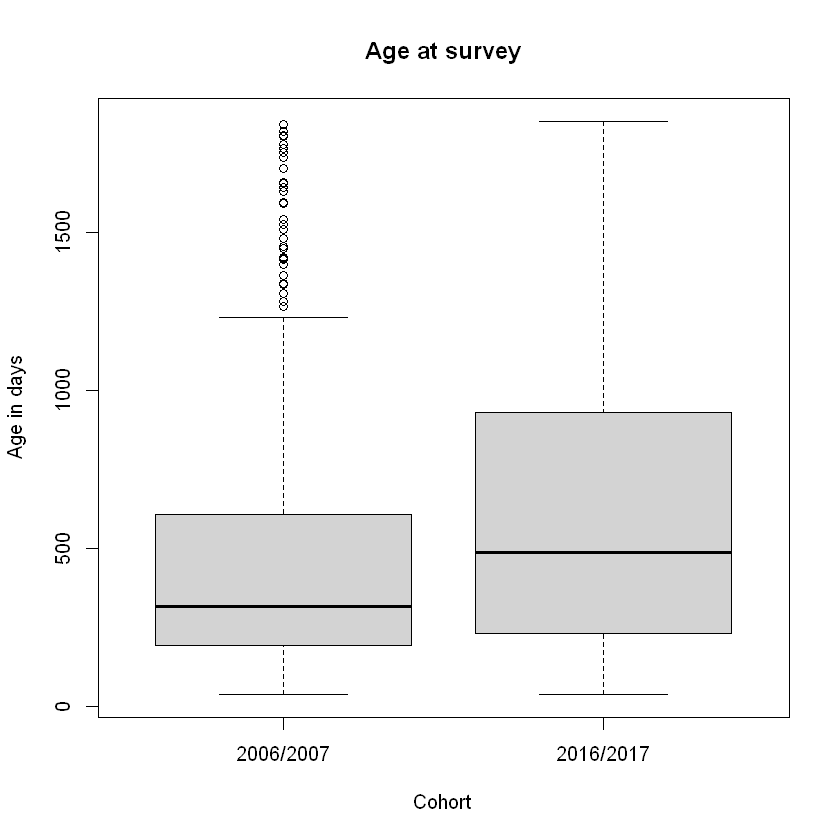

In [10]:
# PNG device
#png("age_at_survey_days.png")

# Code
boxplot(age_days ~ cohort, rsv.data,
       main = "Age at survey",
        xlab = "Cohort",
        ylab = "Age in days")

# Close device
#dev.off()

In [11]:
# PNG device
#png("age_at_survey_months.png")

# Code
boxplot(age_at_consul_mo ~ cohort, rsv.data,
       main = "Age at survey",
        xlab = "Cohort",
        ylab = "Age in months")

# Close device
#dev.off()

ERROR: Error in eval(predvars, data, env): object 'age_at_consul_mo' not found


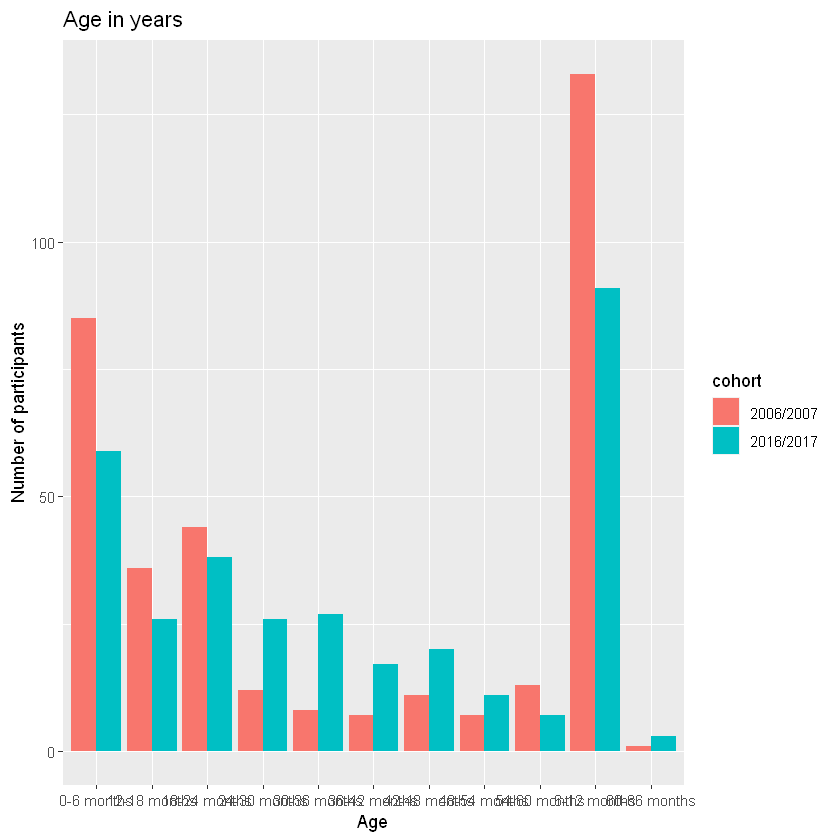

In [30]:
#png("age_years.png")
ggplot(rsv.data, aes(x = age_years, y = ..count.., fill=cohort)) + geom_bar(position="dodge") +
labs(title="Age in years",
        x ="Age", y = "Number of participants")
#dev.off()

In [13]:
car.data = table(rsv.data$age_years, rsv.data$cohort) 
print(car.data)

# Perform the Chi-Square test.
print(chisq.test(car.data))

              
               2006/2007 2016/2017
  0-6 months          85        59
  12-18 months        36        26
  18-24 months        44        38
  24-30 months        12        26
  30-36 months         8        27
  36-42 months         7        17
  42-48 months        11        20
  48-54 months         7        11
  54-60 months        13         7
  6-12 months        133        91
  60-66 months         1         3


Warning message in chisq.test(car.data):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  car.data
X-squared = 39.147, df = 10, p-value = 2.393e-05



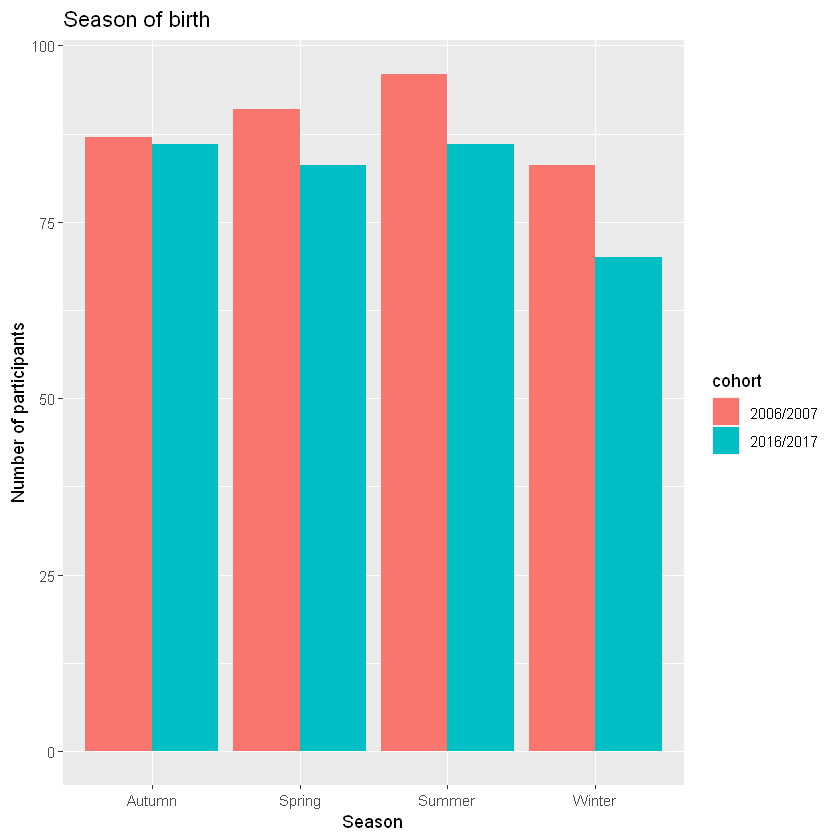

In [14]:
#png("season_birth.png")
ggplot(rsv.data, aes(season_birth, fill=cohort)) + geom_bar(position="dodge") +
labs(title="Season of birth",
        x ="Season", y = "Number of participants")
#dev.off()

In [15]:
car.data = table(rsv.data$season_birth, rsv.data$cohort) 
print(car.data)

# Perform the Chi-Square test.
print(chisq.test(car.data))

        
         2006/2007 2016/2017
  Autumn        87        86
  Spring        91        83
  Summer        96        86
  Winter        83        70

	Pearson's Chi-squared test

data:  car.data
X-squared = 0.52732, df = 3, p-value = 0.9129



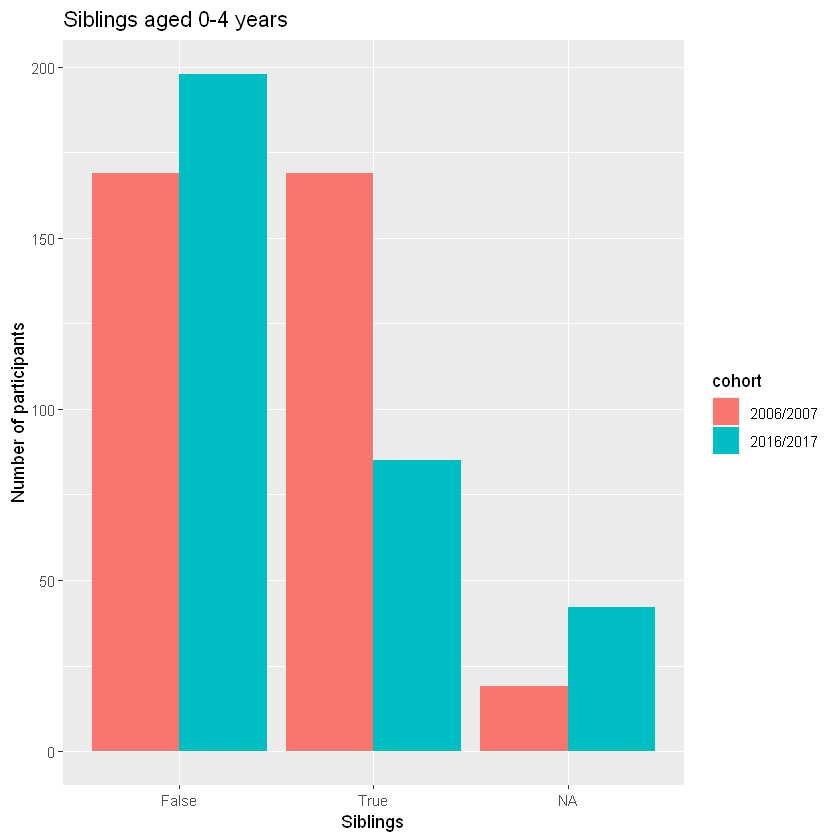

In [77]:
#png("siblings04.png")
ggplot(rsv.data, aes(Siblings04, fill=cohort)) + geom_bar(position="dodge") +
labs(title="Siblings aged 0-4 years",
        x ="Siblings", y = "Number of participants")
#dev.off()

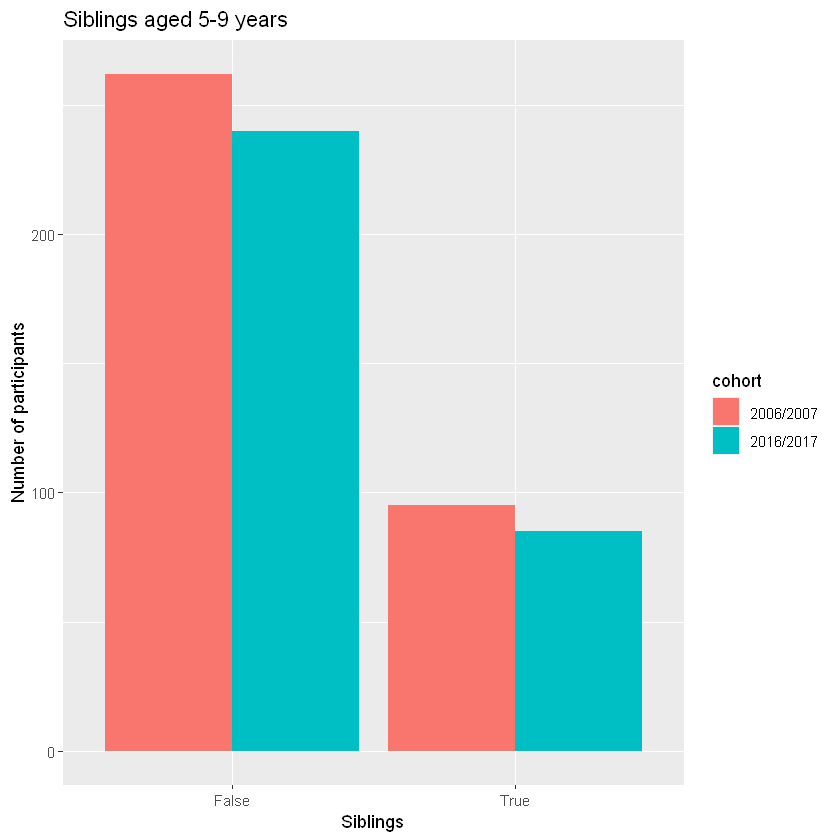

In [79]:
#png("siblings59.png")
ggplot(rsv.data, aes(Siblings59, fill=cohort)) + geom_bar(position="dodge") +
labs(title="Siblings aged 5-9 years",
        x ="Siblings", y = "Number of participants")
#dev.off()

In [31]:
car.data = table(rsv.data$infection, rsv.data$cohort) 
print(car.data)

# Perform the Chi-Square test.
print(chisq.test(car.data))

   
    2006/2007 2016/2017
  0       189       148
  1       168       177

	Pearson's Chi-squared test with Yates' continuity correction

data:  car.data
X-squared = 3.4394, df = 1, p-value = 0.06366



In [32]:
car.data = table(rsv.data$Nursery, rsv.data$cohort) 
print(car.data)

# Perform the Chi-Square test.
print(chisq.test(car.data))

       
        2006/2007 2016/2017
  False       235       156
  True        120       149

	Pearson's Chi-squared test with Yates' continuity correction

data:  car.data
X-squared = 14.771, df = 1, p-value = 0.0001214



In [37]:
car.data = table(rsv.data$contacttotal, rsv.data$cohort) 
print(car.data)

# Perform the Chi-Square test.
print(chisq.test(car.data))

     
      2006/2007 2016/2017
  0          16        68
  1          20        11
  2          25        32
  3          20        25
  4          27        23
  5          25        17
  6          25        18
  7          13        14
  8           6        15
  9          15        11
  10         14         8
  11          5         5
  12         11         9
  13          5         7
  14          5        10
  15          2         3
  16          1         1
  17          3         3
  18          1         5
  19          1         1
  20          3         0
  21          1         4
  22          1         2
  23          1         3
  24          3         1
  25          2         3
  26          2         1
  27          2         0
  28          1         1
  29          3         2
  31          0         1
  33          0         3
  34          0         1
  35          0         1
  37          0         1
  38          3         1
  40          0         1
  46  

Warning message in chisq.test(car.data):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  car.data
X-squared = 75.934, df = 48, p-value = 0.006245

